In [1]:
from time import time
import json
import pickle
import copy
import csv
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import networkx as nx
from itertools import islice
from qiskit import transpile, ClassicalRegister
from qiskit.quantum_info import partial_trace, Statevector, DensityMatrix, Operator
from qiskit_ibm_provider import IBMProvider
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Batch, Sampler, Options
#from qiskit.providers.ibmq.managed import IBMQJobManager
from utilities import IBM_startup, bit_str_list, run_cal, load_cal
from teleportation import Teleportation, calc_negativities, calc_n_mean, calc_teleported_negativities, plot_teleported_negativities_multi_gap, teleported_negativities_multi_gap_data

hub = "ibm-q-melbourne"
group = "unimelb"
project = "hub"
backend_name = 'ibm_sherbrooke'
hgp = f"{hub}/{group}/{project}"

#provider = IBMProvider()
provider = IBM_startup()
backend = provider.get_backend(backend_name, instance=hgp)
#backend = provider.backend.ibmq_mumbai
#provider = startup()

def take(n, iterable):
    """Return the first n items of the iterable as a list."""
    return list(islice(iterable, n))

Account enabled


In [ ]:
a = [1,2,3,4,5,6]
a[1::2]

In [2]:
options = Options()
options.transpilation.initial_layout

In [ ]:
from utilities import run_cal
run_cal(backend)

In [ ]:
print(backend.configuration().to_dict()['coords'])

In [3]:
#save coupling gate error data
import csv

Long_chain = Teleportation(backend, qubits_to_connect=list(range(127)))
calibrations = Long_chain.edge_params

with open('optimal paths/sherbrooke data/post selected new/ECR_err_2024_2_28.csv', 'w', newline='') as f:
    w = csv.writer(f)
    for k, v in calibrations.items():
        if v < 0.5:
            w.writerow([k] + [2*(0.5-v)])
        else:
            w.writerow([k] + [0])

Test optimal paths/chains for Teleportation

In [7]:
#submit QST job
#qubits_to_connect = [qubit for qubit in range(127) if qubit not in [16,106]]
qubits_to_connect = list(range(127))
print(qubits_to_connect)
graphstate = Teleportation(backend, qubits_to_connect=qubits_to_connect)
shots = 8192
job = graphstate.run_qst(reps=4, shots=shots, qrem=True, execute_only=True)
print("Device:", backend.name, f'({len(backend.properties().qubits)} qubits)')
print("Job ID:", job.job_id())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126]
Device: ibm_sherbrooke (127 qubits)
Job ID: cqg60xk372pg008sfyeg


In [3]:
with open('optimal paths/sherbrooke data/post selected new/sherbrooke_negativity_optimal_paths_2023_02_27.pkl', 'rb') as file:
    best_paths_err = pickle.load(file)
print(best_paths_err[19])

#for gap, lst in best_paths_err.items():
#    paths = [info[1] for info in lst if ((52 in info[1]) and (56 in info[1])) or 
#             ((56 in info[1]) and (57 in info[1])) or 
#             ((62 in info[1]) and (63 in info[1])) or 
#             ((63 in info[1]) and (64 in info[1]))]
#    print(len(paths))

[(0.007136034783850429, [50, 49, 55, 68, 67, 66, 73, 85, 84, 83, 82, 81, 80, 79, 91, 98, 97, 96, 109, 114, 113]), (0.007284266305022842, [51, 50, 49, 55, 68, 67, 66, 73, 85, 84, 83, 82, 81, 80, 79, 91, 98, 97, 96, 109, 114]), (0.00765163234884761, [36, 51, 50, 49, 55, 68, 67, 66, 73, 85, 84, 83, 82, 81, 80, 79, 91, 98, 97, 96, 95]), (0.007876793084021037, [51, 50, 49, 55, 68, 67, 66, 73, 85, 84, 83, 82, 81, 80, 79, 91, 98, 97, 96, 95, 94])]


In [6]:
with open('optimal paths/sherbrooke data/dynamic circuits new/sherbrooke_ECR_err_optimal_paths_2023_02_22.pkl', 'rb') as file:
    best_paths_err = pickle.load(file)
print(best_paths_err)

for gap, lst in best_paths_err.items():
    mean_err = np.std([info[0] for info in lst])/np.sqrt(len(lst))
    print(mean_err)

{1: [(0.9830329693584007, [24, 25, 26]), (0.9838249767715506, [25, 26, 27]), (0.9839729678701081, [31, 32, 36]), (0.9850649735439174, [61, 62, 72])], 2: [(0.9742001250081623, [60, 61, 62, 72]), (0.9743838406017238, [53, 60, 61, 62]), (0.9758040285840625, [61, 62, 72, 81]), (0.9760448794378618, [24, 25, 26, 27])], 3: [(0.9628551528407227, [97, 96, 109, 114, 113]), (0.9630535484021353, [59, 60, 61, 62, 72]), (0.9650413243402973, [60, 61, 62, 72, 81]), (0.9666676188426826, [53, 60, 61, 62, 72])], 4: [(0.9520138516309601, [60, 61, 62, 72, 81, 80]), (0.9520708708320875, [22, 23, 24, 25, 26, 27]), (0.9539995406517039, [59, 60, 61, 62, 72, 81]), (0.9575796339350789, [53, 60, 61, 62, 72, 81])], 5: [(0.9399664664636542, [42, 41, 53, 60, 61, 62, 72]), (0.9411211253267888, [59, 60, 61, 62, 72, 81, 80]), (0.9420902757634947, [58, 59, 60, 61, 62, 72, 81]), (0.9446528895216889, [53, 60, 61, 62, 72, 81, 80])], 6: [(0.9250823198716345, [9, 8, 16, 26, 25, 24, 23, 22]), (0.9270198244569826, [41, 53, 60,

Find Optimal Paths (calibrated error only)

In [3]:
#qubits_to_connect = [qubit for qubit in range(127) if qubit not in [16,106]]
qubits_to_connect = list(range(127))
print(qubits_to_connect)
Long_chain = Teleportation(backend, qubits_to_connect=qubits_to_connect)
error_graph = Long_chain.graph
#extract the best chains for teleportation at different length
#iterate over all possible gaps, find best chain for each gap (highest negativity)
best_paths_CXerr = {}
Long_chain.gen_teleportation_basis()
print('teleportation basis generated')
for gap in range(1,20):
    avaliable_paths = Long_chain.teleportation_basis[gap]
    best_path_CXerr = []
    #best_err = 1
    for pair in avaliable_paths.keys():
        #print(pair)
        all_shortest_paths = nx.all_shortest_paths(error_graph, pair[0], pair[1], weight=1)
        for path in all_shortest_paths:
            #print(path)
            net_err = 1
            for i in range(len(path)-1):
                if error_graph.get_edge_data(path[i], path[i+1])['weight'] > 0.5:
                    net_err *= 0
                else:
                    #net_err *= 2*(0.5 - error_graph.get_edge_data(path[i], path[i+1])['weight'])
                    net_err *= (1 - error_graph.get_edge_data(path[i], path[i+1])['weight'])
            best_path_CXerr.append((net_err, path))
    best_path_CXerr = sorted(best_path_CXerr)[-4:]
        #if net_err < best_err:
        #    best_path_CXerr = path.copy()
        #    best_err = net_err
            
    #best_paths_CXerr[gap] = (best_err, sorted(best_path_CXerr))
    best_paths_CXerr[gap] = best_path_CXerr
    print(f'gap {gap} has best paths {best_path_CXerr}')

#dump the optimal paths data to local paths
with open('optimal paths/ecr_test_2.pkl', 'wb') as file:
    #file.write(json.dumps(best_paths_CXerr))
    pickle.dump(best_paths_CXerr, file, protocol=pickle.HIGHEST_PROTOCOL)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126]
teleportation basis generated
gap 1 has best paths [(0.9917380622021472, [25, 26, 27]), (0.9918776565875408, [47, 48, 49]), (0.9920449268397847, [35, 47, 46]), (0.9921907455185188, [46, 47, 48])]
gap 2 has best paths [(0.9863473483639542, [91, 98, 97, 96]), (0.9871092189351613, [35, 47, 48, 49]), (0.9873298020126311, [42, 41, 53, 60]), (0.988740553336759, [46, 47, 48, 49])]
gap 3 has best paths [(0.9804066884786354, [91, 98, 97, 96, 109]), (0.9811519990533347, [98, 97, 

Find Optimal paths

In [ ]:
Long_chain = Teleportation(backend, qubits_to_connect=list(range(127)))
Long_chain.gen_qst_circuits()
print(Long_chain.batches)

In [2]:
#retrieve QST job
#qubits_to_connect = [qubit for qubit in range(127) if qubit not in [16,106]]
qubits_to_connect = list(range(127))
print(qubits_to_connect)
Long_chain = Teleportation(backend, qubits_to_connect=qubits_to_connect)
#job = provider.backend.retrieve_job('cpfmq95yx18g008bnw00') #ibm_torino submitted at 1.11
#job = provider.backend.retrieve_job('cpfmr7g2zy6g008p8100') #ibm_sherbrooke negativity job submitted at 1.11
#job = provider.backend.retrieve_job('cpkphqe6q5h0008bmqjg') #ibm_sherbrooke negativity job submitted at 1.17 (failed)
#job = provider.backend.retrieve_job('cpmbes3dmm10008nzsdg') #ibm_torino negativity job submitted at 1.18 
#job = provider.backend.retrieve_job('cpmf2m29nad0008ppp30') #ibm_cusco negativity job submitted at 1.18 
#job = provider.backend.retrieve_job('cpmc820sp83g008y4srg') #ibm_sherbrooke negativity job completed at 1.19
#job = provider.backend.retrieve_job('cpwwkcdd7p30008cf3mg') #ibm_sherbrooke negativity job completed at 1.31
#job = provider.backend.retrieve_job('cq3k9h6hbttg008r3ap0') #ibm_brisbane negativity job completed at 2.10
#job = provider.backend.retrieve_job('cq9yb9nrr08g008srqz0') #ibm_sherbrooke negativity job completed at 2.20
#job = provider.backend.retrieve_job('cqb8hm645x8000845htg') #ibm_sherbrooke negativity job completed at 2.22
#job = provider.backend.retrieve_job('cqcjxqpxdecg008w4b10') #ibm_sherbrooke negativity job completed at 2.24
#job = provider.backend.retrieve_job('cqd8de53ptq00086yt00') #ibm_sherbrooke negativity job completed at 2.25
#job = provider.backend.retrieve_job('cqepcbhgepgg008fdfw0') #ibm_sherbrooke negativity job completed at 2.27
job = provider.backend.retrieve_job('cqg60xk372pg008sfyeg') #ibm_sherbrooke negativity job completed at 2.29

result = job.result()

#obtain negativity information for all nearest pairs
rho_dict_mit, rho_dict = Long_chain.qst_from_result(result, 'all')
n_list = calc_negativities(rho_dict, mode='mean')
nmit_list = calc_negativities(rho_dict_mit, mode='mean')

try:
    n_list[0]
except:
    n_list = [n_list]
    nmit_list = [nmit_list]
edges = n_list[0].keys()
n_mean, n_std = calc_n_mean(n_list)
nmit_mean, nmit_std = calc_n_mean(nmit_list)
print(nmit_mean)
#construct graphs that have their edges with weight = CZ error or negativity or mitigated negativity 
error_graph = Long_chain.graph
n_graph = nx.Graph()
nmit_graph = nx.Graph()
for edge, neg in n_mean.items():
    n_graph.add_edge(edge[0], edge[1], weight=neg)
for edge, neg in nmit_mean.items():
    nmit_graph.add_edge(edge[0], edge[1], weight=neg)

#extract the best chains for teleportation at different length
#iterate over all possible gaps, find best chain for each gap (highest negativity)
best_paths_CXerr = {}
best_paths_n = {}
best_paths_nmit = {}
Long_chain.gen_teleportation_basis()
print('teleportation basis generated')
for gap in range(1,20):
    avaliable_paths = Long_chain.teleportation_basis[gap]
    best_path_CXerr = []
    best_path_n = []
    best_path_nmit = []
    #best_err = 1
    #best_n = 0
    #best_nmit = 0
    for pair in avaliable_paths.keys():
        all_shortest_paths = nx.all_shortest_paths(error_graph, pair[0], pair[1], weight=1)
        for path in all_shortest_paths:
            #path = nx.shortest_path(error_graph, pair[0], pair[1], weight = 1)
            net_err = 1
            net_n = 1
            net_nmit = 1
            for i in range(len(path)-1):
                if error_graph.get_edge_data(path[i], path[i+1])['weight'] > 0.5:
                    net_err *= 0
                else:
                    net_err *= 2*(0.5 - error_graph.get_edge_data(path[i], path[i+1])['weight'])
                net_n *= 2*n_graph.get_edge_data(path[i], path[i+1])['weight']
                net_nmit *= 2*nmit_graph.get_edge_data(path[i], path[i+1])['weight']
        
            best_path_CXerr.append((net_err, path))
            best_path_n.append((net_n, path))
            best_path_nmit.append((net_nmit, path))
    
    best_path_CXerr = sorted(best_path_CXerr)[-4:]
    best_path_n = sorted(best_path_n)[-4:]
    best_path_nmit = sorted(best_path_nmit)[-4:]
    
        #if net_err < best_err:
            #best_path_CXerr = path.copy()
            #best_err = net_err
        #if net_n > best_n:
            #best_path_n = path.copy()
            #best_n = net_n
        #if net_nmit > best_nmit:
            #best_path_nmit = path.copy()
            #best_nmit = net_nmit
    best_paths_CXerr[gap] = best_path_CXerr
    best_paths_n[gap] = best_path_n
    best_paths_nmit[gap] = best_path_nmit
    #best_paths_CXerr[gap] = (best_err, sorted(best_path_CXerr))
    #best_paths_n[gap] = (best_n, sorted(best_path_n))
    #best_paths_nmit[gap] = (best_nmit, sorted(best_path_nmit))
    
    print(f'gap {gap} has best paths {best_path_CXerr}')
    print(f'gap {gap} has best paths {best_path_n}')
    print(f'gap {gap} has best paths {best_path_nmit}')

#dump the optimal paths data to local paths
with open('optimal paths/sherbrooke data/post selected new/sherbrooke_ECR_err_optimal_paths_2023_02_27.pkl', 'wb') as file:
    #file.write(json.dumps(best_paths_CXerr))
    pickle.dump(best_paths_CXerr, file, protocol=pickle.HIGHEST_PROTOCOL)
with open('optimal paths/sherbrooke data/post selected new/sherbrooke_negativity_optimal_paths_2023_02_27.pkl', 'wb') as file:
    #file.write(json.dumps(best_paths_n))
    pickle.dump(best_paths_n, file, protocol=pickle.HIGHEST_PROTOCOL)
with open('optimal paths/sherbrooke data/post selected new/sherbrooke_negativity_mitigated_optimal_paths_2023_02_29.pkl', 'wb') as file:
    #file.write(json.dumps(best_paths_nmit))
    pickle.dump(best_paths_nmit, file, protocol=pickle.HIGHEST_PROTOCOL)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126]
{(0, 1): 0.4805615782910745, (0, 14): 0.47079608712221815, (1, 2): 0.4306338470595287, (2, 3): 0.4378210049569957, (3, 4): 0.45990099516040905, (4, 5): 0.4728573525376008, (4, 15): 0.37338528695269924, (5, 6): 0.4532711874318992, (6, 7): 0.4646783132505325, (7, 8): 0.437580464287574, (8, 9): 0.38512757434065803, (8, 16): 0.40568739577490776, (9, 10): 0.40455893842400287, (10, 11): 0.4153966003219011, (11, 12): 0.4717075829255095, (12, 13): 0.4743923251376724, (12, 17): 

In [ ]:
with open('optimal paths/sherbrooke_ECR_err_optimal_paths_2023_01_19_new.pkl', 'rb') as file:
    best_paths_err = pickle.load(file)
print(best_paths_err)

In [ ]:
with open('optimal paths/sherbrooke_ECR_err_optimal_paths_2023_01_19.pkl', 'rb') as file:
    best_paths_err = pickle.load(file)
print(best_paths_err)
with open('optimal paths/sherbrooke_ECR_err_optimal_paths_2023_01_19_new.pkl', 'rb') as file:
    best_paths_err = pickle.load(file)
print(best_paths_err)

Plot Negativity Map

In [3]:
import csv

#retrieve QST job
Long_chain = Teleportation(backend, qubits_to_connect=list(range(127)))
#job = provider.backend.retrieve_job('cpfmq95yx18g008bnw00') #ibm_torino submitted at 1.11
#job = provider.backend.retrieve_job('cpfmr7g2zy6g008p8100') #ibm_sherbrooke negativity job submitted at 1.11
#job = provider.backend.retrieve_job('cpkphqe6q5h0008bmqjg') #ibm_sherbrooke negativity job submitted at 1.17 (failed)
#job = provider.backend.retrieve_job('cpmbes3dmm10008nzsdg') #ibm_torino negativity job submitted at 1.18 
#job = provider.backend.retrieve_job('cpmf2m29nad0008ppp30') #ibm_cusco negativity job submitted at 1.18 
#job = provider.backend.retrieve_job('cpmc820sp83g008y4srg') #ibm_sherbrooke negativity job completed at 1.19
#job = provider.backend.retrieve_job('cq3k9h6hbttg008r3ap0') #ibm_brisbane negativity job completed at 2.10
#job = provider.backend.retrieve_job('cq9yb9nrr08g008srqz0') #ibm_sherbrooke negativity job completed at 2.20
#job = provider.backend.retrieve_job('cqb8hm645x8000845htg') #ibm_sherbrooke negativity job completed at 2.22
#job = provider.backend.retrieve_job('cqcjxqpxdecg008w4b10') #ibm_sherbrooke negativity job completed at 2.24
#job = provider.backend.retrieve_job('cqd8de53ptq00086yt00') #ibm_sherbrooke negativity job completed at 2.25
#job = provider.backend.retrieve_job('cqepcbhgepgg008fdfw0') #ibm_sherbrooke negativity job completed at 2.27
job = provider.backend.retrieve_job('cqg60xk372pg008sfyeg') #ibm_sherbrooke negativity job completed at 2.29
result = job.result()

#obtain negativity information for all nearest pairs
rho_dict_mit, rho_dict = Long_chain.qst_from_result(result, 'all')
n_list = calc_negativities(rho_dict, mode='mean')
nmit_list = calc_negativities(rho_dict_mit, mode='mean')

try:
    n_list[0]
except:
    n_list = [n_list]
    nmit_list = [nmit_list]
n_mean, n_std = calc_n_mean(n_list)
nmit_mean, nmit_std = calc_n_mean(nmit_list)

n_dicts = dict.fromkeys(n_mean)
for k, v in n_dicts.items():
    n_dicts[k] = []
for i in range(len(n_list)):
    for k in n_dicts.keys():
        #print(k)
        n_dicts[k].append(2*n_list[i][k])
        
nmit_dicts = dict.fromkeys(nmit_mean)
for k, v in nmit_dicts.items():
    nmit_dicts[k] = []
for i in range(len(nmit_list)):
    for k in nmit_dicts.keys():
        #print(k)
        nmit_dicts[k].append(2*nmit_list[i][k])

#with open('optimal paths/sherbrooke data/post selected new/neg_2024_2_27.csv', 'w', newline='') as f:
#    w = csv.writer(f)
#    for k, v in n_dicts.items():
#        w.writerow([k] + v)
        
with open('optimal paths/sherbrooke data/post selected new/neg_qrem_2024_2_29.csv', 'w', newline='') as f:
    w = csv.writer(f)
    for k, v in nmit_dicts.items():
        w.writerow([k] + v)

Post-processing job submission (ibm_torino)

In [ ]:
with open('optimal paths/torino_CZ_err_optimal_paths_2023_01_25.pkl', 'rb') as file:
    best_paths_err = pickle.load(file)

print(best_paths_err)
test = Teleportation(backend, qubits_to_connect=list(range(133)))
print(test.backend.backend_name)
test.gen_teleportation_basis()
test.gen_teleported_BellState_circuit(post_processing = True)
teleportation_circs = test.teleported_BellState_circuits.copy()

for gap in range(1,5):
    pairs_to_teleport = [(best_paths_err[gap][i][1][0], best_paths_err[gap][i][1][-1]) for i in range(4)]
    test.teleported_BellState_circuits = {gap: {pair: teleportation_circs[gap][pair] 
                                                for pair in pairs_to_teleport}}
    test.gen_teleported_qst_circuits()
    print(test.name_list)
    if gap == 1:
        job,job_qrem = test.run_teleported_qst_circuits(reps=4, shots=8192, qrem=True, sim=None)
        print(f'job_qrem: {job_qrem.job_id()}')
        print(f'job{gap}: {job.job_id()}')
    else:
        job,_ = test.run_teleported_qst_circuits(reps=4, shots=8192, qrem=False, sim=None)
        print(f'job{gap}: {job.job_id()}')

Post-processing job submission (ibm_sherbrooke)

In [9]:
#with open('optimal paths/sherbrooke data/post selected new/sherbrooke_negativity_optimal_paths_2023_02_24.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
#with open('optimal paths/sherbrooke data/post selected new/sherbrooke_negativity_optimal_paths_2023_02_27.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
#with open('optimal paths/sherbrooke data/post selected new/sherbrooke_negativity_mitigated_optimal_paths_2023_02_27.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file) 
#with open('optimal paths/sherbrooke data/post selected new/sherbrooke_ECR_err_optimal_paths_2023_02_28.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
with open('optimal paths/sherbrooke data/post selected new/sherbrooke_negativity_mitigated_optimal_paths_2023_02_29.pkl', 'rb') as file:
    best_paths_err = pickle.load(file) 
print(best_paths_err)

#qubits_to_connect = [qubit for qubit in range(127) if qubit not in [16,106]]
qubits_to_connect = list(range(127))
test = Teleportation(backend, qubits_to_connect=qubits_to_connect)
test.gen_teleportation_basis()
test.gen_teleported_BellState_circuit(post_processing = True)
teleportation_circs = test.teleported_BellState_circuits.copy()

jobs_id = []
jobs_id.append(['gaps','jobs_id'])

service = QiskitRuntimeService()
backend = service.backend(test.backend.name)
with Session(service=service, backend=backend) as session:
    for gap in range(1,20):
        paths_to_teleport = [best_paths_err[gap][i][1] for i in range(4)]
        path_dict = {}
        for path in paths_to_teleport:
            #if (not ((52 in path) and (56 in path))) and (not ((56 in path) and (57 in path))) and (not ((62 in path) and (63 in path))) and (not ((63 in path) and (64 in path))):
            if True:
                pair = (path[0], path[-1])
                if pair not in path_dict:
                    path_dict[pair] = [path]
                else:
                    path_dict[pair].append(path)
        test.teleported_BellState_circuits = {gap: {pair: {tuple(path): teleportation_circs[gap][pair][tuple(path)] 
                                                            for path in paths} 
                                                    for pair, paths in path_dict.items()}}
        test.gen_teleported_qst_circuits()
        print(test.name_list)
        print(len(test.name_list))
        if gap == 1:
            job,_ = test.run_teleported_qst_circuits(reps=4, shots=8192, qrem=False, sim='session', session=session)
            #print(f'job_qrem: {job_qrem.job_id()}')
            print(f'job{gap}: {job.job_id()}')
            jobs_id.append([f'{gap}', job.job_id()])
        else:
            job,_ = test.run_teleported_qst_circuits(reps=4, shots=8192, qrem=False, sim='session', session=session)
            print(f'job{gap}: {job.job_id()}')
            jobs_id.append([f'{gap}', job.job_id()])

with open('optimal paths/sherbrooke data/post selected new/2.29 Nmit optimal job ids','w') as fp:
    writer = csv.writer(fp, delimiter='|')
    writer.writerows(jobs_id)

{1: [(0.9397415538811543, [57, 58, 59]), (0.9411139226310128, [42, 43, 44]), (0.9494789331573564, [108, 112, 126]), (0.9569393380857921, [78, 79, 91])], 2: [(0.894006888826166, [42, 43, 44, 45]), (0.9008457225914739, [70, 74, 89, 88]), (0.9015648919088523, [92, 102, 103, 104]), (0.9127026360202708, [108, 112, 126, 125])], 3: [(0.8508280950278769, [70, 74, 89, 88, 87]), (0.853447256052439, [75, 76, 77, 78, 79]), (0.8568070815464276, [69, 70, 74, 89, 88]), (0.8703168308860609, [76, 77, 78, 79, 91])], 4: [(0.8086944686337544, [76, 77, 78, 79, 91, 98]), (0.8092346100078396, [69, 70, 74, 89, 88, 87]), (0.8139985624873708, [37, 52, 56, 57, 58, 59]), (0.8326896097467721, [75, 76, 77, 78, 79, 91])], 5: [(0.7645835022356962, [90, 75, 76, 77, 78, 79, 91]), (0.7686395145692326, [105, 106, 107, 108, 112, 126, 125]), (0.773731424687537, [75, 76, 77, 78, 79, 91, 98]), (0.7754676868170447, [93, 106, 107, 108, 112, 126, 125])], 6: [(0.7090897001023077, [81, 82, 83, 92, 102, 103, 104, 111]), (0.7137640

In [2]:
#with open('optimal paths/sherbrooke_negativity_mitigated_optimal_paths_2023_01_11.pkl', 'rb') as file:
#    best_paths_nmit = pickle.load(file)   
#with open('optimal paths/sherbrooke_ECR_err_optimal_paths_2023_01_14.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
#with open('optimal paths/sherbrooke_ECR_err_optimal_paths_2023_01_15.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
#with open('optimal paths/sherbrooke_ECR_err_optimal_paths_2023_01_17.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
#with open('optimal paths/sherbrooke_ECR_err_optimal_paths_2023_01_19.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
#with open('optimal paths/sherbrooke_negativity_mitigated_optimal_paths_2023_01_19.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
#with open('optimal paths/sherbrooke_negativity_optimal_paths_2023_01_19_new.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
#with open('optimal paths/negativity_optimal_paths_2023_01_11.pkl', 'rb') as file:
#    best_paths_n = pickle.load(file)
#with open('optimal paths/negativity_mitigated_optimal_paths_2023_01_11.pkl', 'rb') as file:
#    best_paths_nmit = pickle.load(file)
#with open('optimal paths/sherbrooke data/post selected new/sherbrooke_negativity_mitigated_optimal_paths_2023_02_22.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
#with open('optimal paths/sherbrooke data/post selected new/sherbrooke_negativity_optimal_paths_2023_02_22.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
#with open('optimal paths/sherbrooke data/post selected new/sherbrooke_ECR_err_optimal_paths_2023_02_22.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
with open('optimal paths/sherbrooke data/post selected new/sherbrooke_negativity_optimal_paths_2023_02_27.pkl', 'rb') as file:
    best_paths_err = pickle.load(file)
print(best_paths_err)

#qubits_to_connect = [qubit for qubit in range(127) if qubit not in [16,106]]
qubits_to_connect = list(range(127))
test = Teleportation(backend, qubits_to_connect=qubits_to_connect)
test.gen_teleportation_basis()
test.gen_teleported_BellState_circuit(post_processing = True)
teleportation_circs = test.teleported_BellState_circuits.copy()

jobs_id = []
jobs_id.append(['gaps','jobs_id'])
for gap in range(1,2):
    paths_to_teleport = [best_paths_err[gap][i][1] for i in range(4)]
    path_dict = {}
    for path in paths_to_teleport:
        pair = (path[0], path[-1])
        if pair not in path_dict:
            path_dict[pair] = [path]
        else:
            path_dict[pair].append(path)
    test.teleported_BellState_circuits = {gap: {pair: {tuple(path): teleportation_circs[gap][pair][tuple(path)] 
                                                        for path in paths} 
                                                for pair, paths in path_dict.items()}}
    test.gen_teleported_qst_circuits()
    print(test.name_list)
    if gap == 1:
        job,job_qrem = test.run_teleported_qst_circuits(reps=4, shots=8192, qrem=True, sim=None)
        print(f'job_qrem: {job_qrem.job_id()}')
        print(f'job{gap}: {job.job_id()}')
        jobs_id.append([f'{gap}', job.job_id()])
    else:
        job,_ = test.run_teleported_qst_circuits(reps=4, shots=8192, qrem=False, sim=None)
        print(f'job{gap}: {job.job_id()}')
        jobs_id.append([f'{gap}', job.job_id()])
        
#with open('optimal paths/sherbrooke data/post selected new/ECR optimal job ids','w') as fp:
#    writer = csv.writer(fp, delimiter='|')
#    writer.writerows(jobs_id)

{1: [(0.7350606641734, [119, 120, 121]), (0.7363645398637675, [47, 48, 49]), (0.7497017891353224, [49, 50, 51]), (0.7653076532077542, [44, 45, 46])], 2: [(0.6203891513212187, [47, 48, 49, 50]), (0.6272044237187054, [45, 46, 47, 48]), (0.637888495454651, [48, 49, 50, 51]), (0.642221790156268, [44, 45, 46, 47])], 3: [(0.52061080231597, [46, 47, 48, 49, 50]), (0.5336608395317702, [45, 46, 47, 48, 49]), (0.5520538129916749, [47, 48, 49, 50, 51]), (0.5558040167967135, [44, 45, 46, 47, 48])], 4: [(0.44315767169331777, [36, 51, 50, 49, 48, 47]), (0.44961072594796003, [45, 46, 47, 48, 49, 50]), (0.46326596442105844, [46, 47, 48, 49, 50, 51]), (0.4729093529989054, [44, 45, 46, 47, 48, 49])], 5: [(0.37188379345672873, [36, 51, 50, 49, 48, 47, 46]), (0.38621523174162964, [44, 45, 46, 47, 48, 49, 55]), (0.398427431355041, [44, 45, 46, 47, 48, 49, 50]), (0.40008648618842635, [45, 46, 47, 48, 49, 50, 51])], 6: [(0.2943298281092261, [43, 44, 45, 46, 47, 48, 49, 50]), (0.31662833472644425, [44, 45, 46

Retrieve Post-selected jobs

In [2]:
#job_qrem = provider.backend.retrieve_job('cqb9t30c0xhg0089sq1g') # 2.22 Nmit optimal qrem job
#job_qrem = provider.backend.retrieve_job('cqbbj2845x80008ww4j0') # 2.22 N optimal qrem job
#job_qrem = provider.backend.retrieve_job('cqck8vvfejeg0085s99g') # 2.24 N optimal qrem job
#job_qrem = provider.backend.retrieve_job('cqbd4h2c0xhg0085k5dg') # 2.22 ECR optimal qrem job
#job_qrem = provider.backend.retrieve_job('cqevhfnxftxg0089bjm0') # 2.27 N optimal qrem job
#job_qrem = provider.backend.retrieve_job('cqevwf9gepgg008fdma0') # 2.27 Nmit optimal qrem job
#job_qrem = provider.backend.retrieve_job('cqfah14xdecg008wajr0') # 2.28 ECR optimal qrem job
job_qrem = provider.backend.retrieve_job('cqggv14qbra0008az6mg') # 2.29 Nmit optimal qrem job
result_qrem = job_qrem.result() 

service = QiskitRuntimeService()
with open('optimal paths/sherbrooke data/post selected new/2.29 Nmit optimal job ids','r') as fp:
    reader = csv.reader(fp, delimiter='|')
    line_count = 0
    for row in reader:
        if line_count > 0 and line_count % 2 == 0:
            print(row)
            #vars()[f'result{row[0]}'] = provider.backend.retrieve_job(row[1]).result()
            vars()[f'result{row[0]}'] = service.job(row[1]).result()
            #exec("%s = %d" % (f'job{row[0]}_1', provider.backend.retrieve_job(row[1])))
        line_count += 1

['1', 'cqgqb7m984bg008phr4g']
['2', 'cqgqb85hykgg008ydr40']
['3', 'cqgqb9n984bg008phr50']
['4', 'cqgqban984bg008phr5g']
['5', 'cqgqbb5984bg008phr60']
['6', 'cqgqbbx984bg008phr6g']
['7', 'cqgqbcdhykgg008ydr4g']
['8', 'cqgqbd5qbra0008azeg0']
['9', 'cqgqbdnhykgg008ydr50']
['10', 'cqgqbedej5d0008bn3d0']
['11', 'cqgqbex98a000084kbr0']
['12', 'cqgqbfn984bg008phr70']
['13', 'cqgqbg6hykgg008ydr5g']
['14', 'cqgqbh6qbra0008azegg']
['15', 'cqgqbhp98a000084kbrg']
['16', 'cqgqbjeqbra0008azeh0']
['17', 'cqgqbke984bg008phr7g']
['18', 'cqgqbm698a000084kbs0']
['19', 'cqgqbmyhykgg008ydr60']


In [ ]:
#ibm_sherbrooke jobs post processed jobs (reduced depth GS/IBMBackend Job) (latest, gap = 15) (mitigated negativity optimal)
#job_qrem = provider.backend.retrieve_job('cpfxmf9btqp0008g2xm0')
#job1 = provider.backend.retrieve_job('cpfxmgaprheg008s4zfg') 
#job2 = provider.backend.retrieve_job('cpfxmhayx18g008bprd0')
#job3 = provider.backend.retrieve_job('cpfxmjayx18g008bprdg')
#job4 = provider.backend.retrieve_job('cpfxmka2zy6g008p8zhg')
#job5 = provider.backend.retrieve_job('cpfxmma2zy6g008p8zj0')
#job6 = provider.backend.retrieve_job('cpfxmnjmbjng00868kag')
#job7 = provider.backend.retrieve_job('cpfxmpjmbjng00868kb0')
#job8 = provider.backend.retrieve_job('cpfxmqjja3gg00816vy0')
#job9 = provider.backend.retrieve_job('cpfxmrkprheg008s4zg0')
#job10 = provider.backend.retrieve_job('cpfxmsvbtqp0008g2xn0')
#job11 = provider.backend.retrieve_job('cpfxmtvbtqp0008g2xng')
#job12 = provider.backend.retrieve_job('cpfxmvvbtqp0008g2xp0')
#job13 = provider.backend.retrieve_job('cpfxmx3btqp0008g2xpg')
#job14 = provider.backend.retrieve_job('cpfxmybbtqp0008g2xq0')
#job15 = provider.backend.retrieve_job('cpfxmzbyx18g008bpreg')

#ibm_sherbrooke jobs post processed jobs (reduced depth GS/IBMBackend Job) (latest, gap = 15) (ECR gate error optimal)
#job_qrem = provider.backend.retrieve_job('cphwmahja3gg008zwjd0')
#job1 = provider.backend.retrieve_job('cphwmbsmbjng0080jwbg') 
#job2 = provider.backend.retrieve_job('cphwmcsbtqp00083450g')
#job3 = provider.backend.retrieve_job('cphwmdsja3gg008zwjdg')
#job4 = provider.backend.retrieve_job('cphwmf12zy6g0083732g')
#job5 = provider.backend.retrieve_job('cphwmg2prheg008s3bd0')
#job6 = provider.backend.retrieve_job('cphwmhaprheg008s3bdg')
#job7 = provider.backend.retrieve_job('cphwmjjprheg008s3bf0')
#job8 = provider.backend.retrieve_job('cphwmkt2zy6g0083733g')
#job9 = provider.backend.retrieve_job('cphwmmtja3gg008zwje0')
#job10 = provider.backend.retrieve_job('cphwmp2btqp000834510')
#job11 = provider.backend.retrieve_job('cphwmqaja3gg008zwjeg')
#job12 = provider.backend.retrieve_job('cphwmrbprheg008s3bfg')
#job13 = provider.backend.retrieve_job('cphwmsbja3gg008zwjfg')
#job14 = provider.backend.retrieve_job('cphwmtkbtqp000834530')
#job15 = provider.backend.retrieve_job('cphwmvvja3gg008zwjg0')

#ibm_sherbrooke jobs post processed jobs (latest, gap = 18) (ECR gate error optimal)
#job_qrem = provider.backend.retrieve_job('cpj7eb1ak1m00087c5wg')
#job1 = provider.backend.retrieve_job('cpj7ec9f7dt0008vr7fg') 
#job2 = provider.backend.retrieve_job('cpj7edhak1m00087c5x0')
#job3 = provider.backend.retrieve_job('cpj7ees5qw30008r3030')
#job4 = provider.backend.retrieve_job('cpj7eg2f7dt0008vr7gg')
#job5 = provider.backend.retrieve_job('cpj7ehaak1m00087c5xg')
#job6 = provider.backend.retrieve_job('cpj7ejansjx0008ww9ag')
#job7 = provider.backend.retrieve_job('cpj7ekjak1m00087c5y0')
#job8 = provider.backend.retrieve_job('cpj7emtsypyg008f93f0')
#job9 = provider.backend.retrieve_job('cpj7entsypyg008f93fg')
#job10 = provider.backend.retrieve_job('cpj7eq2ak1m00087c5yg')
#job11 = provider.backend.retrieve_job('cpj7erbak1m00087c5z0')
#job12 = provider.backend.retrieve_job('cpj7esk5qw30008r304g')
#job13 = provider.backend.retrieve_job('cpj7etvnsjx0008ww9c0')
#job14 = provider.backend.retrieve_job('cpj7ew3nsjx0008ww9cg')
#job15 = provider.backend.retrieve_job('cpj7exbsypyg008f93g0')
#job16 = provider.backend.retrieve_job('cpj7eyk6q5h0008bhckg')
#job17 = provider.backend.retrieve_job('cpj7ezksypyg008f93gg')
#job18 = provider.backend.retrieve_job('cpj7f0wsypyg008f93hg')

#ibm_sherbrooke jobs post processed jobs (latest, gap = 19) (ECR gate error graph optimal, averaged over 4 best chains)
#job_qrem = provider.backend.retrieve_job('cpmw97w9nad0008pqd80')
#job1 = provider.backend.retrieve_job('cpmw9ad9nad0008pqd8g') 
#job2 = provider.backend.retrieve_job('cpmw9cx1tcz0008m78qg')
#job3 = provider.backend.retrieve_job('cpmw9fxd7p3000861cg0')
#job4 = provider.backend.retrieve_job('cpmw9ky9nad0008pqd90')
#job5 = provider.backend.retrieve_job('cpmw9ppd7p3000861ch0')
#job6 = provider.backend.retrieve_job('cpmw9sfd7p3000861chg')
#job7 = provider.backend.retrieve_job('cpmw9w7dmm10008p0r6g')
#job8 = provider.backend.retrieve_job('cpmw9z7d7p3000861cj0')
#job9 = provider.backend.retrieve_job('cpmwa1r0f6rg008wwzq0')
#job10 = provider.backend.retrieve_job('cpmwa4gd7p3000861cjg')
#job11 = provider.backend.retrieve_job('cpmwa789nad0008pqdb0')
#job12 = provider.backend.retrieve_job('cpmwaa9sp83g008y5s6g')
#job13 = provider.backend.retrieve_job('cpmwad91tcz0008m78v0')
#job14 = provider.backend.retrieve_job('cpmwagad7p3000861cmg')
#job15 = provider.backend.retrieve_job('cpmwaka1tcz0008m78vg')
#job16 = provider.backend.retrieve_job('cpmwapad7p3000861cng')
#job17 = provider.backend.retrieve_job('cpmwas39nad0008pqdc0')
#job18 = provider.backend.retrieve_job('cpmwaw39nad0008pqdcg')
#job19 = provider.backend.retrieve_job('cpmwaz3sp83g008y5s8g')

#ibm_sherbrooke jobs post processed jobs (latest, gap = 19) (Nmit graph optimal, averaged over 4 best chains)
#job_qrem = provider.backend.retrieve_job('cpmwe6g1tcz0008m7930')
#job1 = provider.backend.retrieve_job('cpmwe99sp83g008y5se0') 
#job2 = provider.backend.retrieve_job('cpmwec19nad0008pqdp0')
#job3 = provider.backend.retrieve_job('cpmweehsp83g008y5seg')
#job4 = provider.backend.retrieve_job('cpmweha0f6rg008wx010')
#job5 = provider.backend.retrieve_job('cpmwem2d7p3000861d00')
#job6 = provider.backend.retrieve_job('cpmweptd7p3000861d10')
#job7 = provider.backend.retrieve_job('cpmweskd7p3000861d2g')
#job8 = provider.backend.retrieve_job('cpmwewb0f6rg008wx02g')
#job9 = provider.backend.retrieve_job('cpmwez3d7p3000861d3g')
#job10 = provider.backend.retrieve_job('cpmwf1wdmm10008p0rcg')
#job11 = provider.backend.retrieve_job('cpmwf4wd7p3000861d60')
#job12 = provider.backend.retrieve_job('cpmwf7w1tcz0008m7960')
#job13 = provider.backend.retrieve_job('cpmwfansp83g008y5sj0')
#job14 = provider.backend.retrieve_job('cpmwfdd9nad0008pqdq0')
#job15 = provider.backend.retrieve_job('cpmwfge9nad0008pqdrg')
#job16 = provider.backend.retrieve_job('cpmwfk60f6rg008wx050')
#job17 = provider.backend.retrieve_job('cpmwfp6d7p3000861d7g')
#job18 = provider.backend.retrieve_job('cpmwfsf1tcz0008m797g')
#job19 = provider.backend.retrieve_job('cpmwfwq1tcz0008m7980')

#ibm_sherbrooke jobs post processed jobs (latest, gap = 19) (unmitigated N graph optimal, averaged over 4 best chains)
job_qrem = provider.backend.retrieve_job('cpmwne50f6rg008wx0eg')
job1 = provider.backend.retrieve_job('cpmwngpsp83g008y5ss0') 
job2 = provider.backend.retrieve_job('cpmwnke9nad0008pqee0')
job3 = provider.backend.retrieve_job('cpmwnnp0f6rg008wx0g0')
job4 = provider.backend.retrieve_job('cpmwnr7d7p3000861dv0')
job5 = provider.backend.retrieve_job('cpmwntq9nad0008pqefg')
job6 = provider.backend.retrieve_job('cpmwnx7d7p3000861dvg')
job7 = provider.backend.retrieve_job('cpmwnzq9nad0008pqeg0')
job8 = provider.backend.retrieve_job('cpmwp20sp83g008y5ssg')
job9 = provider.backend.retrieve_job('cpmwp4rdmm10008p0rr0')
job10 = provider.backend.retrieve_job('cpmwp7g1tcz0008m79ng')
job11 = provider.backend.retrieve_job('cpmwpahdmm10008p0rrg')
job12 = provider.backend.retrieve_job('cpmwpd1dmm10008p0rsg')
job13 = provider.backend.retrieve_job('cpmwpfsd7p3000861dx0')
job14 = provider.backend.retrieve_job('cpmwpjjsp83g008y5sw0')
job15 = provider.backend.retrieve_job('cpmwpnasp83g008y5swg')
job16 = provider.backend.retrieve_job('cpmwpr31tcz0008m79qg')
job17 = provider.backend.retrieve_job('cpmwpv3sp83g008y5sx0')
job18 = provider.backend.retrieve_job('cpmwpxv9nad0008pqek0')
job19 = provider.backend.retrieve_job('cpmwq0m9nad0008pqekg')

result_qrem = job_qrem.result()
result1 = job1.result()
result2 = job2.result()
result3 = job3.result()
result4 = job4.result()
result5 = job5.result()
result6 = job6.result()
result7 = job7.result()
result8 = job8.result()
result9 = job9.result()
result10 = job10.result()
result11 = job11.result()
result12 = job12.result()
result13 = job13.result()
result14 = job14.result()
result15 = job15.result()
result16 = job16.result()
result17 = job17.result()
result18 = job18.result()
result19 = job19.result()

Post-Selection ibm_torino Analysis

In [ ]:
with open('optimal paths/torino_CZ_err_optimal_paths_2023_01_11.pkl', 'rb') as file:
    best_paths_CXerr = pickle.load(file)
#with open('optimal paths/negativity_optimal_paths_2023_01_08.pkl', 'rb') as file:
#    best_paths_n = pickle.load(file)
#with open('optimal paths/negativity_mitigated_optimal_paths_2023_01_08.pkl', 'rb') as file:
#    best_paths_nmit = pickle.load(file)
print(best_paths_CXerr)

for gap in range(1,16):
    test = Teleportation(backend, qubits_to_connect=best_paths_CXerr[gap][1])
    test.gen_teleportation_basis()
    test.gen_teleported_BellState_circuit(post_processing = True)
    test.teleported_BellState_circuits = {gap:test.teleported_BellState_circuits[gap]}
    test.gen_teleported_qst_circuits()
    print(test.name_list)
    
    exec(f'{result}=result{gap}')
    rho_dict_list = test.recon_teleported_density_mats(result, result_qrem, post_processing=True, apply_mit=False)
    rho_dict_list_mit = test.recon_teleported_density_mats(result, result_qrem, post_processing=True, apply_mit='reduced_QREM',
                                                            mitigate_qubits=next(iter(best_paths_nmit[gap].values()))['Z'])
    
    exec(f'n_list{gap} = {calc_teleported_negativities(rho_dict_list, post_processing = True, mode='all', witness='negativity')}')
    exec(f'nmit_list{gap} = {calc_teleported_negativities(rho_dict_list_mit, post_processing = True, mode='all', witness='negativity')}')
    #exec(f'n_list{gap}={n_list}')
    #exec(f'nmit_list{gap}={nmit_list}')
print(f'Repetition recovered is {test.reps}')
n_list = []
nmit_list = []
for i in range(4):
    n_list.append(n_list1[i]|n_list2[i]|n_list3[i]|n_list4[i]|n_list5[i]|n_list6[i]|n_list7[i]|n_list8[i]|n_list9[i]|n_list10[i]|
                  n_list11[i]|n_list12[i]|n_list13[i]|n_list14[i])
for i in range(4):
    nmit_list.append(nmit_list1[i]|nmit_list2[i]|nmit_list3[i]|nmit_list4[i]|nmit_list5[i]|nmit_list6[i]|nmit_list7[i]|nmit_list8[i]|nmit_list9[i]|nmit_list10[i]|
                     nmit_list11[i]|nmit_list12[i]|nmit_list13[i]|nmit_list14[i])
print(n_list)
print(nmit_list)
fig = plot_teleported_negativities_multi_gap(backend, n_list, nmit_list, bellstate = 'ignore')
fig.tight_layout()
teleported_negativities_multi_gap_data(n_list, nmit_list, bellstate = 'ignore')

Post-Selection ibm_sherbrooke Analysis

{1: [(0.9397415538811543, [57, 58, 59]), (0.9411139226310128, [42, 43, 44]), (0.9494789331573564, [108, 112, 126]), (0.9569393380857921, [78, 79, 91])], 2: [(0.894006888826166, [42, 43, 44, 45]), (0.9008457225914739, [70, 74, 89, 88]), (0.9015648919088523, [92, 102, 103, 104]), (0.9127026360202708, [108, 112, 126, 125])], 3: [(0.8508280950278769, [70, 74, 89, 88, 87]), (0.853447256052439, [75, 76, 77, 78, 79]), (0.8568070815464276, [69, 70, 74, 89, 88]), (0.8703168308860609, [76, 77, 78, 79, 91])], 4: [(0.8086944686337544, [76, 77, 78, 79, 91, 98]), (0.8092346100078396, [69, 70, 74, 89, 88, 87]), (0.8139985624873708, [37, 52, 56, 57, 58, 59]), (0.8326896097467721, [75, 76, 77, 78, 79, 91])], 5: [(0.7645835022356962, [90, 75, 76, 77, 78, 79, 91]), (0.7686395145692326, [105, 106, 107, 108, 112, 126, 125]), (0.773731424687537, [75, 76, 77, 78, 79, 91, 98]), (0.7754676868170447, [93, 106, 107, 108, 112, 126, 125])], 6: [(0.7090897001023077, [81, 82, 83, 92, 102, 103, 104, 111]), (0.7137640

(array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
        '13', '14', '15', '16', '17', '18', '19'], dtype='<U2'),
 array([0.92044495, 0.88988103, 0.88657328, 0.83259764, 0.81848776,
        0.80984701, 0.80327152, 0.73401779, 0.76116386, 0.73083945,
        0.69433923, 0.65343852, 0.62022572, 0.57961962, 0.60732965,
        0.6355027 , 0.62172177, 0.54499047, 0.50380337]),
 array([0.00349271, 0.00499463, 0.00760593, 0.01069803, 0.00464225,
        0.00398512, 0.00399337, 0.02399453, 0.01130279, 0.00990392,
        0.02142891, 0.01741654, 0.01850978, 0.01348657, 0.01174782,
        0.00849145, 0.00952413, 0.01943406, 0.01864178]),
 array([0.97008021, 0.94022808, 0.94883318, 0.8957618 , 0.92767649,
        0.8998009 , 0.91454364, 0.84873342, 0.90301805, 0.86111643,
        0.7911567 , 0.69956345, 0.64447645, 0.5923616 , 0.6129776 ,
        0.63959714, 0.62298665, 0.54660096, 0.50583321]),
 array([0.0025566 , 0.00690612, 0.00834978, 0.014028  , 0.01019265,
        0.

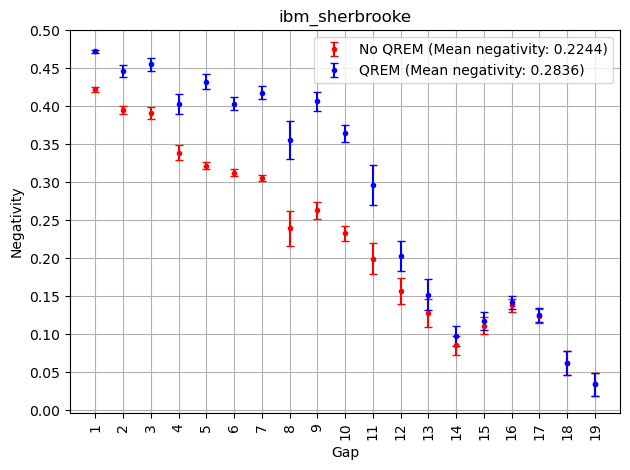

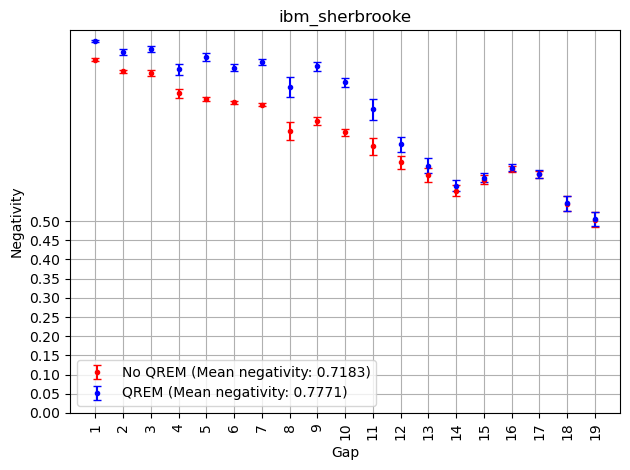

In [4]:
#with open('optimal paths/sherbrooke_negativity_mitigated_optimal_paths_2023_01_11.pkl', 'rb') as file:
#    best_paths_nmit = pickle.load(file)
#with open('optimal paths/sherbrooke_ECR_err_optimal_paths_2023_01_14.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
#with open('optimal paths/sherbrooke_ECR_err_optimal_paths_2023_01_15.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
#with open('optimal paths/sherbrooke_ECR_err_optimal_paths_2023_01_17.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
#with open('optimal paths/sherbrooke_ECR_err_optimal_paths_2023_01_19.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
#with open('optimal paths/sherbrooke_negativity_mitigated_optimal_paths_2023_01_19.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
#with open('optimal paths/sherbrooke_negativity_optimal_paths_2023_01_19.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
#with open('optimal paths/sherbrooke data/post selected new/sherbrooke_negativity_mitigated_optimal_paths_2023_02_22.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
#with open('optimal paths/sherbrooke data/post selected new/sherbrooke_negativity_optimal_paths_2023_02_22.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
#with open('optimal paths/sherbrooke data/post selected new/sherbrooke_negativity_optimal_paths_2023_02_24.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
#with open('optimal paths/sherbrooke data/post selected new/sherbrooke_ECR_err_optimal_paths_2023_02_22.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
#with open('optimal paths/sherbrooke data/post selected new/sherbrooke_negativity_optimal_paths_2023_02_27.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
with open('optimal paths/sherbrooke data/post selected new/sherbrooke_negativity_mitigated_optimal_paths_2023_02_29.pkl', 'rb') as file:
    best_paths_err = pickle.load(file)
#with open('optimal paths/sherbrooke data/post selected new/sherbrooke_ECR_err_optimal_paths_2023_02_28.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
print(best_paths_err)

test = Teleportation(backend, qubits_to_connect=list(range(127)))
test.gen_teleportation_basis()
test.gen_teleported_BellState_circuit(post_processing = True)
teleportation_circs = test.teleported_BellState_circuits.copy()

for gap in range(1,20):
    paths_to_teleport = [best_paths_err[gap][i][1] for i in range(4)]
    path_dict = {}
    for path in paths_to_teleport:
        pair = (path[0], path[-1])
        if pair not in path_dict:
            path_dict[pair] = [path]
        else:
            path_dict[pair].append(path)
    test.teleported_BellState_circuits = {gap: {pair: {tuple(path): teleportation_circs[gap][pair][tuple(path)] 
                                                       for path in paths}
                                                for pair, paths in path_dict.items()}}
    test.gen_teleported_qst_circuits()
    print(test.name_list)
    
    exec(f'result=result{gap}')
    rho_dict_list = test.recon_teleported_density_mats(result, result_qrem, post_processing=True, apply_mit=False, session=True)
    
    paths = [set(best_paths_err[gap][i][1]) for i in range(4)]
    mitigate_qubits = sorted(list(paths[0].union(paths[1], paths[2], paths[3])))
    rho_dict_list_mit = test.recon_teleported_density_mats(result, result_qrem, post_processing=True, apply_mit='reduced_QREM',
                                                            mitigate_qubits=mitigate_qubits, session = True)

    n_list = calc_teleported_negativities(rho_dict_list, post_processing = True, mode='all', witness='negativity')
    nmit_list = calc_teleported_negativities(rho_dict_list_mit, post_processing = True, mode='all', witness='negativity')
    exec(f'n_list{gap}={n_list}')
    exec(f'nmit_list{gap}={nmit_list}')
    
    f_list = calc_teleported_negativities(rho_dict_list, post_processing = True, mode='all', witness='fidelity')
    fmit_list = calc_teleported_negativities(rho_dict_list_mit, post_processing = True, mode='all', witness='fidelity')
    exec(f'f_list{gap}={f_list}')
    exec(f'fmit_list{gap}={fmit_list}')

print(f'Repetition recovered is {test.reps}')
n_list = []
nmit_list = []
for i in range(4):
    n_list.append(n_list1[i]|n_list2[i]|n_list3[i]|n_list4[i]|n_list5[i]|n_list6[i]|n_list7[i]|n_list8[i]|n_list9[i]|n_list10[i]|
                  n_list11[i]|n_list12[i]|n_list13[i]|n_list14[i]|n_list15[i]|n_list16[i]|n_list17[i]|n_list18[i]|n_list19[i])
for i in range(4):
    nmit_list.append(nmit_list1[i]|nmit_list2[i]|nmit_list3[i]|nmit_list4[i]|nmit_list5[i]|nmit_list6[i]|nmit_list7[i]|nmit_list8[i]|nmit_list9[i]|nmit_list10[i]|
                     nmit_list11[i]|nmit_list12[i]|nmit_list13[i]|nmit_list14[i]|nmit_list15[i]|nmit_list16[i]|nmit_list17[i]|nmit_list18[i]|nmit_list19[i])
print(n_list)
print(nmit_list)
fig = plot_teleported_negativities_multi_gap(backend, n_list, nmit_list, bellstate = 'ignore')
fig.tight_layout()
teleported_negativities_multi_gap_data(n_list, nmit_list, bellstate = 'ignore')

f_list = []
fmit_list = []
for i in range(4):
    f_list.append(f_list1[i]|f_list2[i]|f_list3[i]|f_list4[i]|f_list5[i]|f_list6[i]|f_list7[i]|f_list8[i]|f_list9[i]|f_list10[i]|
                  f_list11[i]|f_list12[i]|f_list13[i]|f_list14[i]|f_list15[i]|f_list16[i]|f_list17[i]|f_list18[i]|f_list19[i])
for i in range(4):
    fmit_list.append(fmit_list1[i]|fmit_list2[i]|fmit_list3[i]|fmit_list4[i]|fmit_list5[i]|fmit_list6[i]|fmit_list7[i]|fmit_list8[i]|fmit_list9[i]|fmit_list10[i]|
                     fmit_list11[i]|fmit_list12[i]|fmit_list13[i]|fmit_list14[i]|fmit_list15[i]|fmit_list16[i]|fmit_list17[i]|fmit_list18[i]|fmit_list19[i])
print(f_list)
print(fmit_list)
fig = plot_teleported_negativities_multi_gap(backend, f_list, fmit_list, bellstate = 'ignore')
fig.tight_layout()
teleported_negativities_multi_gap_data(f_list, fmit_list, bellstate = 'ignore')

In [46]:
from teleportation import calc_teleported_n_mean_gap
mean, std = calc_teleported_n_mean_gap(fmit_list, bellstate='BS_4')
for k,v in std.items():
    print(v)

0.0
0.010074218192023058
0.012397250805500913
0.01274487650028652
0.009247691084078394
0.009222157407565379
0.007946977330268395
0.025874986350262724
0.013258276909070598
0.011294514723492346
0.025479987373998307
0.019873016334954516
0.020843782524213775
0.01473370196870526
0.011420213966085575
0.008551200554384445
0.01040804525897462
0.01916779371845683
0.019201099203178366


Dynamic Circuits submission (ibm_torino)

In [ ]:
with open('optimal paths/torino_CZ_err_optimal_paths_2023_01_25.pkl', 'rb') as file:
    best_paths_err = pickle.load(file)

print(best_paths_err)
test = Teleportation(backend, qubits_to_connect=list(range(133)))
print(test.backend.backend_name)
test.gen_teleportation_basis()
test.gen_teleported_BellState_circuit(post_processing = False)
teleportation_circs = test.teleported_BellState_circuits.copy()

for gap in range(2,5):
    pairs_to_teleport = [(best_paths_err[gap][i][1][0], best_paths_err[gap][i][1][-1]) for i in range(4)]
    test.teleported_BellState_circuits = {gap: {pair: teleportation_circs[gap][pair] 
                                                for pair in pairs_to_teleport}}
    test.gen_teleported_qst_circuits()
    print(test.name_list)
    if gap == 1:
        job,job_qrem = test.run_teleported_qst_circuits(reps=1, shots=8192, qrem=True, sim=None)
        print(f'job_qrem: {job_qrem.job_id()}')
        print(f'job{gap}: {job.job_id()}')
    else:
        job,_ = test.run_teleported_qst_circuits(reps=1, shots=8192, qrem=False, sim=None)
        print(f'job{gap}: {job.job_id()}')

Noise model test

In [ ]:
from qiskit import Aer, execute, QuantumCircuit, ClassicalRegister
from qiskit.providers.aer.noise import NoiseModel
from copy import deepcopy
import numpy as np
import numpy.linalg as la
from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import plot_state_city
from teleportation import find_closest_pvec

with open('optimal paths/sherbrooke_negativity_optimal_paths_2023_01_19.pkl', 'rb') as file:
    best_paths_err = pickle.load(file)
example_chain = sorted(best_paths_err[8][-1][-1])
noisy_qubits = [0,1,2,3,4,5,6,7,8,9]

qrem0 = QuantumCircuit(10, name='qrem0')
qrem1 = QuantumCircuit(10, name='qrem1')
qrem1.x(noisy_qubits)

reg0 = ClassicalRegister(len(noisy_qubits)-1)
qrem0.add_register(reg0)
reg1 = ClassicalRegister(len(noisy_qubits)-1)
qrem1.add_register(reg1)


qrem0.measure(noisy_qubits[:-1], reg0)
qrem1.measure(noisy_qubits[:-1], reg1)
qrem0.barrier()
qrem1.barrier()
for i in range(len(noisy_qubits)-1):
    with qrem0.if_test((reg0[i],0)):
        qrem0.x(noisy_qubits[-1])

for i in range(len(noisy_qubits)-1):
    with qrem1.if_test((reg1[i],1)):
        qrem1.x(noisy_qubits[-1])
        
reg0_1 = ClassicalRegister(1)
qrem0.add_register(reg0_1)
reg1_1 = ClassicalRegister(1)
qrem1.add_register(reg1_1)

qrem0.measure(noisy_qubits[-1],reg0_1[0])
qrem1.measure(noisy_qubits[-1],reg1_1[0])
qrem_circuits = [qrem0, qrem1]

#
noise_model = NoiseModel.from_backend(backend)
noise_dict = noise_model.to_dict()
noise_dict_new = deepcopy(noise_dict)
index_to_remove = set()
for i in range(len(noise_dict['errors'])):
    for gate_qubit in noise_dict['errors'][i]['gate_qubits'][0]:
        #print(gate_qubit)
        if gate_qubit not in example_chain:
            index_to_remove.add(i)
for i in sorted(list(index_to_remove), reverse=True):
    noise_dict_new['errors'].pop(i)
for i in range(len(noise_dict_new['errors'])):
    print(noise_dict_new['errors'][i]['gate_qubits'][0])

#
coupling_map = backend.configuration().coupling_map
coupling_map_new = []
for pair in coupling_map:
    skip = False
    for qubit in pair:
        if qubit not in example_chain:
            skip = True
    if skip == False:
        coupling_map_new.append(pair)
print(coupling_map_new)

#
backend = Aer.get_backend('aer_simulator')
noise_model_new = NoiseModel.from_dict(noise_dict_new)
basis_gates = noise_model_new.basis_gates
job_qrem = execute(qrem_circuits, backend=backend, initial_layout=example_chain, coupling_map=coupling_map_new, noise_model=noise_model_new, shots=8192)
result_qrem = job_qrem.result()

#
qrem_counts = [result_qrem.get_counts('qrem0'), result_qrem.get_counts('qrem1')]
qrem_shots = result_qrem.results[0].shots

M_dict = {qubit: np.zeros((2, 2)) for qubit in noisy_qubits[:-1]}
for jj, counts in enumerate(qrem_counts):
    print(counts)
    for bit_str, count in counts.items():
        second_layer, first_layer = bit_str.split(' ')
        for i, q in enumerate(first_layer[::-1]):
            ii = int(q)
            M_dict[noisy_qubits[i]][ii, jj] += count
# Normalise
norm = 1/qrem_shots
for M in M_dict.values():
    M *= norm

dets = []
for M in M_dict.values():
    det = la.det(M)
    dets.append(det)
print(dets)
print(M_dict)
#plot 3D calibration matrix
#for qubit, M in M_dict:
#    rho = DensityMatrix(M)
#    plot_state_city(rho, title='q_{qubit} calibration matrix')

In [ ]:
from qiskit.circuit.library import RZGate
from qiskit import qasm3
#test new delay circuits
with open('optimal paths/torino_CZ_err_optimal_paths_2023_01_11.pkl', 'rb') as file:
    best_paths_CXerr = pickle.load(file)
print(best_paths_CXerr)

test = Teleportation(backend, qubits_to_connect=best_paths_CXerr[2][1])
test.gen_teleportation_basis()
test.gen_teleported_BellState_circuit(post_processing = False)
test.teleported_BellState_circuits = {2:test.teleported_BellState_circuits[2]}
test.gen_teleported_qst_circuits()
print(test.name_list)

circ_list = []
for pairs_dict in test.teleported_BellState_circuits_qst.values():
    for basis_dict in pairs_dict.values():
        for circuit in basis_dict.values():
            circ_list.append(circuit)

circ_list_transpiled = transpile(circ_list, backend = test.backend, 
                                 initial_layout=list(range(test.device_size)), optimization_level = 1)
new_circ_list_transpiled = []
for circ in circ_list_transpiled:
    instructions = []
    new_circ = circ.copy()
    for instruction, qargs, cargs in circ:
        if instruction.name == 'rz':
            instruction = RZGate(phi=1.570796)
        instructions.append((instruction, qargs, cargs))
    new_circ.data = instructions
    new_circ_list_transpiled.append(new_circ)
circ_list_transpiled = new_circ_list_transpiled

#qasm3.dumps(circ_list_transpiled[0])
circ_list_transpiled[0].draw()
#test.teleported_BellState_circuits_qst[2][(31,36)]['ZZ'].draw()
#job,_ = test.run_teleported_qst_circuits(reps=4, shots=8192, qrem=False, sim=None)
#print(f'job: {job.job_id()}')

Dynamic Circuit job submission (ibm_sherbrooke) (Deprecated)

In [ ]:
with open('optimal paths/torino_CZ_err_optimal_paths_2023_01_11.pkl', 'rb') as file:
    best_paths_CXerr = pickle.load(file)
#with open('optimal paths/negativity_optimal_paths_2023_01_08.pkl', 'rb') as file:
#    best_paths_n = pickle.load(file)
#with open('optimal paths/negativity_mitigated_optimal_paths_2023_01_08.pkl', 'rb') as file:
#    best_paths_nmit = pickle.load(file)
print(best_paths_CXerr)

for gap in range(1,16):
    test = Teleportation(backend, qubits_to_connect=best_paths_CXerr[gap][1])
    test.gen_teleportation_basis()
    test.gen_teleported_BellState_circuit(post_processing = False)
    test.teleported_BellState_circuits = {gap:test.teleported_BellState_circuits[gap]}
    test.gen_teleported_qst_circuits()
    print(test.name_list)
    if gap == 1:
        job,job_qrem = test.run_teleported_qst_circuits(reps=4, shots=8192, qrem=True, sim=None)
        print(f'job_qrem: {job_qrem.job_id()}')
        print(f'job{gap}: {job.job_id()}')
    else:
        job,_ = test.run_teleported_qst_circuits(reps=4, shots=8192, qrem=False, sim=None)
        print(f'job{gap}: {job.job_id()}')

Dynamic Circuits Submission (ibm_sherbrooke)

In [ ]:
#with open('optimal paths/sherbrooke_negativity_mitigated_optimal_paths_2023_01_11.pkl', 'rb') as file:
#    best_paths_nmit = pickle.load(file)
#with open('optimal paths/sherbrooke_ECR_err_optimal_paths_2023_01_14.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
#with open('optimal paths/sherbrooke_ECR_err_optimal_paths_2023_01_15.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
#with open('optimal paths/sherbrooke_ECR_err_optimal_paths_2023_01_19.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
#with open('optimal paths/sherbrooke_negativity_mitigated_optimal_paths_2023_01_19.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
#with open('optimal paths/sherbrooke_negativity_optimal_paths_2023_01_19.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
#with open('optimal paths/osaka_ECR_err_optimal_paths_2023_02_09.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
#with open('optimal paths/brisbane_negativity_mitigated_optimal_paths_2023_02_10.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
#with open('optimal paths/brisbane_negativity_optimal_paths_2023_02_10.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file) 
#with open('optimal paths/brisbane_ECR_err_optimal_paths_2023_02_14.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file) 
#with open('optimal paths/sherbrooke_negativity_mitigated_optimal_paths_2023_02_20.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file) 
#with open('optimal paths/sherbrooke_negativity_optimal_paths_2023_02_20.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
with open('optimal paths/sherbrooke_ECR_err_optimal_paths_2023_02_22.pkl', 'rb') as file:
    best_paths_err = pickle.load(file)
print(best_paths_err)

#qubits_to_connect = [qubit for qubit in range(127) if qubit not in [16,106]]
qubits_to_connect = list(range(127))
print(qubits_to_connect)
test = Teleportation(backend, qubits_to_connect=qubits_to_connect)
test.gen_teleportation_basis()
test.gen_teleported_BellState_circuit(post_processing = False)
teleportation_circs = test.teleported_BellState_circuits.copy()

jobs_id = []
jobs_id.append(['gaps','jobs_id'])
for gap in range(1,20):
    paths_to_teleport = [best_paths_err[gap][i][1] for i in range(4)]
    path_dict = {}
    for path in paths_to_teleport:
        pair = (path[0], path[-1])
        if pair not in path_dict:
            path_dict[pair] = [path]
        else:
            path_dict[pair].append(path)
    test.teleported_BellState_circuits = {gap: {pair: {tuple(path): teleportation_circs[gap][pair][tuple(path)] 
                                                        for path in paths} 
                                                for pair, paths in path_dict.items()}}
    test.gen_teleported_qst_circuits()
    print(test.name_list)
    if gap == 1:
        job,job_qrem = test.run_teleported_qst_circuits(reps=2, shots=8192, qrem=True, sim=None)
        print(f'job_qrem: {job_qrem.job_id()}')
        print(f'job{gap}: {job.job_id()}')
        jobs_id.append([f'{gap}', job.job_id()])
    else:
        job,_ = test.run_teleported_qst_circuits(reps=2, shots=8192, qrem=False, sim=None)
        print(f'job{gap}: {job.job_id()}')
        jobs_id.append([f'{gap}', job.job_id()])
        
with open('optimal paths/sherbrooke data/ECR optimal job ids 2','w') as fp:
    writer = csv.writer(fp, delimiter='|')
    writer.writerows(jobs_id)

Dynamic Circuits Submission (ibm_brisbane) (job sessions)

In [ ]:
#with open('optimal paths/brisbane_ECR_err_optimal_paths_2023_02_10.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file) 
with open('optimal paths/brisbane_ECR_err_optimal_paths_2023_02_14.pkl', 'rb') as file:
    best_paths_err = pickle.load(file)
print(best_paths_err)

qubits_to_connect = [qubit for qubit in range(127) if qubit not in [16,106]]
#qubits_to_connect = list(range(127))
print(qubits_to_connect)
test = Teleportation(backend, qubits_to_connect=qubits_to_connect)
test.gen_teleportation_basis()
test.gen_teleported_BellState_circuit(post_processing = False)
teleportation_circs = test.teleported_BellState_circuits.copy()

service = QiskitRuntimeService()
backend = service.backend(test.backend.name)
with Session(service=service, backend=backend) as session:
    for i in range(1):
        for gap in range(1,3):
            paths_to_teleport = [best_paths_err[gap][j][1] for j in range(4)]
            path_dict = {}
            for path in paths_to_teleport:
                pair = (path[0], path[-1])
                if pair not in path_dict:
                    path_dict[pair] = [path]
                else:
                    path_dict[pair].append(path)
            test.teleported_BellState_circuits = {gap: {pair: {tuple(path): teleportation_circs[gap][pair][tuple(path)] 
                                                               for path in paths} 
                                                        for pair, paths in path_dict.items()}}
            test.gen_teleported_qst_circuits()
            print(test.name_list)
            if gap == 1:
                job,job_qrem = test.run_teleported_qst_circuits(reps=2, shots=8192, qrem=True, sim='session', session=session)
                print(f'job_qrem: {job_qrem.job_id()}')
                print(f'job{gap}: {job.job_id()}')
            else:
                job,_ = test.run_teleported_qst_circuits(reps=2, shots=8192, qrem=False, sim='session', session=session)
                print(f'job{gap}: {job.job_id()}')

Retrieve Dynamic Circuit Jobs

In [2]:
#job_qrem = provider.backend.retrieve_job('cqa02bsvxbdg008de7ng') # 2.20 Nmit optimal qrem job
#job_qrem = provider.backend.retrieve_job('cqab6j2cc620008w1g8g') # 2.20 N optimal qrem job
job_qrem = provider.backend.retrieve_job('cqazgsk45x80008mmkw0') # 2.22 ECR optimal qrem job
result_qrem = job_qrem.result()

with open('optimal paths/sherbrooke data/dynamic circuits new/ECR optimal job ids 1','r') as fp:
    reader = csv.reader(fp, delimiter='|')
    line_count = 0
    for row in reader:
        if line_count > 0 and line_count % 2 == 0:
            print(row)
            vars()[f'result{row[0]}_1'] = provider.backend.retrieve_job(row[1]).result()
            #exec("%s = %d" % (f'job{row[0]}_1', provider.backend.retrieve_job(row[1])))
        line_count += 1

with open('optimal paths/sherbrooke data/dynamic circuits new/ECR optimal job ids 2','r') as fp:
    reader = csv.reader(fp, delimiter='|')
    line_count = 0
    for row in reader:
        if line_count > 0 and line_count % 2 == 0:
            print(row)
            vars()[f'result{row[0]}_2'] = provider.backend.retrieve_job(row[1]).result()
            #exec("%s = %d" % (f'job{row[0]}_2', provider.backend.retrieve_job(row[1])))
        line_count += 1

['1', 'cqaze6gd8ej0008nnakg']
['2', 'cqaze7r45x80008xvx60']
['3', 'cqazea9d8ej0008nnam0']
['4', 'cqazebse3nj00085dct0']
['5', 'cqazeesc0xhg0083y3eg']
['6', 'cqazegj0s53g008ppdj0']
['7', 'cqazej2c0xhg0083y3f0']
['8', 'cqazemjtzeqg008vwjpg']
['9', 'cqazepa45x80008xvx6g']
['10', 'cqazes3d8ej0008nnamg']
['11', 'cqazetktzeqg008vwjq0']
['12', 'cqazexvd8ej0008nnan0']
['13', 'cqazezve3nj00085dcv0']
['14', 'cqazf2me3nj00085dcvg']
['15', 'cqazf4mc0xhg0083y3fg']
['16', 'cqazf6wc0xhg0083y3g0']
['17', 'cqazfade3nj00085dcw0']
['18', 'cqazfcdd8ej0008nnap0']
['19', 'cqazffn0s53g008ppdkg']
['1', 'cqazgvb45x80008mmkwg']
['2', 'cqazgwve3nj00085dcyg']
['3', 'cqazgz345x80008mmkx0']
['4', 'cqazh0ce3nj00085dcz0']
['5', 'cqazh1me3nj00085dczg']
['6', 'cqazh4cd8ej0008nnas0']
['7', 'cqazh64e3nj00085dd00']
['8', 'cqazh8x45x80008mmky0']


In [ ]:
#ibm_sherbrooke jobs dynamic circuit jobs (latest, gap = 19) (ECR gate error optimal, averaged over 4 best chains)
#job_qrem = provider.backend.retrieve_job('cpmwwpjsp83g008y5tcg')
#job1_1 = provider.backend.retrieve_job('cpmwws3dmm10008p0sbg') 
#job2_1 = provider.backend.retrieve_job('cpmwww31tcz0008m7a00')
#job3_1 = provider.backend.retrieve_job('cpmwwyvd7p3000861e9g')
#job4_1 = provider.backend.retrieve_job('cpmwx1wsp83g008y5te0')
#job5_1 = provider.backend.retrieve_job('cpmwx541tcz0008m7a10')
#job6_1 = provider.backend.retrieve_job('cpmwx85d7p3000861ea0')
#job7_1 = provider.backend.retrieve_job('cpmwxb5dmm10008p0scg')
#job8_1 = provider.backend.retrieve_job('cpmwxed0f6rg008wx140')
#job9_1 = provider.backend.retrieve_job('cpmwxhy9nad0008pqez0')

#job10_1 = provider.backend.retrieve_job('cpngdg6dmm10008p26bg')   #only 2 reps for those jobs each
#job11_1 = provider.backend.retrieve_job('cpngdj6sp83g008y77qg')
#job12_1 = provider.backend.retrieve_job('cpnm31csp83g008y7cx0')
#job13_1 = provider.backend.retrieve_job('cpngdp6dmm10008p26c0')
#job14_1 = provider.backend.retrieve_job('cpnm33md7p3000862wt0')
#job15_1 = provider.backend.retrieve_job('cpngdtqsp83g008y77rg')
#job16_1 = provider.backend.retrieve_job('cpnm35m1tcz0008m8nt0')
#job17_1 = provider.backend.retrieve_job('cpngdyq1tcz0008m8jg0')
#job18_1 = provider.backend.retrieve_job('cpnge0rd7p3000862pyg')
#job19_1 = provider.backend.retrieve_job('cpnge380f6rg008wycg0')

#job10_2 = provider.backend.retrieve_job('cpngf6c1tcz0008m8jhg')   #only 2 reps for those jobs each
#job11_2 = provider.backend.retrieve_job('cpngf8d9nad0008prr6g')
#job12_2 = provider.backend.retrieve_job('cpngfansp83g008y77w0')
#job13_2 = provider.backend.retrieve_job('cpngfcnd7p3000862q10')
#job14_2 = provider.backend.retrieve_job('cpngff51tcz0008m8jj0')
#job15_2 = provider.backend.retrieve_job('cpngfh6sp83g008y77wg')
#job16_2 = provider.backend.retrieve_job('cpngfke0f6rg008wycj0')
#job17_2 = provider.backend.retrieve_job('cpngfnesp83g008y77x0')
#job18_2 = provider.backend.retrieve_job('cpngfqp9nad0008prr7g')
#job19_2 = provider.backend.retrieve_job('cpngft7d7p3000862q1g')


#ibm_sherbrooke jobs dynamic circuit jobs (latest, gap = 19) (Nmit graph optimal, averaged over 4 best chains)
#job_qrem = provider.backend.retrieve_job('cpnme0g9nad0008pryyg') #only 2 reps for those jobs each
#job1_1 = provider.backend.retrieve_job('cpnme209nad0008pryz0') 
#job2_1 = provider.backend.retrieve_job('cpnme3g9nad0008pryzg')
#job3_1 = provider.backend.retrieve_job('cpnme58d7p3000862xc0')
#job4_1 = provider.backend.retrieve_job('cpnme6rd7p3000862xcg')
#job5_1 = provider.backend.retrieve_job('cpnme8hsp83g008y7dd0')
#job6_1 = provider.backend.retrieve_job('cpnmea9dmm10008p2a00')
#job7_1 = provider.backend.retrieve_job('cpnmec19nad0008prz2g')
#job8_1 = provider.backend.retrieve_job('cpnmeds0f6rg008wyfj0')
#job9_1 = provider.backend.retrieve_job('cpnmefh9nad0008prz30')
#job10_1 = provider.backend.retrieve_job('cpnmehj9nad0008prz4g')
#job11_1 = provider.backend.retrieve_job('cpnmekad7p3000862xeg')
#job12_1 = provider.backend.retrieve_job('cpnmenj0f6rg008wyfk0')
#job13_1 = provider.backend.retrieve_job('cpnmeqjd7p3000862xfg')
#job14_1 = provider.backend.retrieve_job('cpnmeskd7p3000862xgg')
#job15_1 = provider.backend.retrieve_job('cpnmevvsp83g008y7df0')
#job16_1 = provider.backend.retrieve_job('cpnmexvd7p3000862xhg')
#job17_1 = provider.backend.retrieve_job('cpnmf0c9nad0008prz70')
#job18_1 = provider.backend.retrieve_job('cpnmf2md7p3000862xjg')
#job19_1 = provider.backend.retrieve_job('cpnmf4wdmm10008p2a10')

#job1_2 = provider.backend.retrieve_job('cpnmhvqsp83g008y7dng') #only 2 reps for those jobs each
#job2_2 = provider.backend.retrieve_job('cpnmhx79nad0008prze0')
#job3_2 = provider.backend.retrieve_job('cpnmhyzd7p3000862xtg')
#job4_2 = provider.backend.retrieve_job('cpnmj081tcz0008m8pjg')
#job5_2 = provider.backend.retrieve_job('cpnmj20sp83g008y7dpg')
#job6_2 = provider.backend.retrieve_job('cpnmj48dmm10008p2a6g')
#job7_2 = provider.backend.retrieve_job('cpnmj6rsp83g008y7dqg')
#job8_2 = provider.backend.retrieve_job('cpnmj99d7p3000862xv0')
#job9_2 = provider.backend.retrieve_job('cpnmjb1sp83g008y7drg')
#job10_2 = provider.backend.retrieve_job('cpnmjd9d7p3000862xw0')
#job11_2 = provider.backend.retrieve_job('cpnmjf91tcz0008m8pk0')
#job12_2 = provider.backend.retrieve_job('cpnmjhadmm10008p2a80')
#job13_2 = provider.backend.retrieve_job('cpnmjkjdmm10008p2a8g')
#job14_2 = provider.backend.retrieve_job('cpnv9x71tcz0008m8zzg')
#job15_2 = provider.backend.retrieve_job('cpnmjqtd7p3000862xz0')
#job16_2 = provider.backend.retrieve_job('cpnmjsv1tcz0008m8pkg')
#job17_2 = provider.backend.retrieve_job('cpnvj81dmm10008tpk50')
#job18_2 = provider.backend.retrieve_job('cpnmjy3dmm10008p2a90')
#job19_2 = provider.backend.retrieve_job('cpnmk0m9nad0008przfg')

#ibm_sherbrooke jobs dynamic circuit jobs (latest, gap = 19) (N graph optical, averaged over 4 best chains)
#job_qrem = provider.backend.retrieve_job('cpnwc6gdmm10008hqs20') #only 2 reps for those jobs each
#job1_1 = provider.backend.retrieve_job('cpnw9wfsp83g008y7r9g') 
#job2_1 = provider.backend.retrieve_job('cpnw9y70f6rg008wyr70')
#job3_1 = provider.backend.retrieve_job('cpnw9zqd7p3000863ay0')
#job4_1 = provider.backend.retrieve_job('cpnwa180f6rg008wyr7g')
#job5_1 = provider.backend.retrieve_job('cpphvy70f6rg008wzyrg')
#job6_1 = provider.backend.retrieve_job('cpnwa50sp83g008y7rag')
#job7_1 = provider.backend.retrieve_job('cpnwa6r9nad0008psbt0')
#job8_1 = provider.backend.retrieve_job('cpnwa8sd7p3000863ayg')
#ob9_1 = provider.backend.retrieve_job('cpnwaasdmm10008hqrz0')
#job10_1 = provider.backend.retrieve_job('cpnwacsdmm10008hqrzg')
#job11_1 = provider.backend.retrieve_job('cpnwaes1tcz0008m90vg')
#job12_1 = provider.backend.retrieve_job('cpnwahasp83g008y7rb0')
#job13_1 = provider.backend.retrieve_job('cpnwakjd7p3000863az0')
#job14_1 = provider.backend.retrieve_job('cpnwanjsp83g008y7rbg')
#job15_1 = provider.backend.retrieve_job('cpnwar3d7p3000863azg')
#job16_1 = provider.backend.retrieve_job('cpnwatbdmm10008hqs0g')
#job17_1 = provider.backend.retrieve_job('cpnwawv1tcz0008m90w0')
#job18_1 = provider.backend.retrieve_job('cpptpnjd7p30008hyjx0')
#job19_1 = provider.backend.retrieve_job('cpnwb1msp83g008y7rcg')

#job1_2 = provider.backend.retrieve_job('cpptphjd7p30008hyjw0') #only 2 reps for those jobs each
#job2_2 = provider.backend.retrieve_job('cpnwca1sp83g008y7re0')
#job3_2 = provider.backend.retrieve_job('cpnwcbhd7p3000863b10')
#job4_2 = provider.backend.retrieve_job('cpnwcdhsp83g008y7reg')
#job5_2 = provider.backend.retrieve_job('cpnwcfs9nad0008psbv0')
#job6_2 = provider.backend.retrieve_job('cpptpka0f6rg008x0eq0')
#job7_2 = provider.backend.retrieve_job('cpnwckt9nad0008psbw0')
#job8_2 = provider.backend.retrieve_job('cpnwcnj1tcz0008m90wg')
#job9_2 = provider.backend.retrieve_job('cpnwcqa9nad0008psbx0')
#job10_2 = provider.backend.retrieve_job('cpnwcskd7p3000863b1g')
#job11_2 = provider.backend.retrieve_job('cpnwcvk9nad0008psby0')
#job12_2 = provider.backend.retrieve_job('cpnwcxvdmm10008hqs40')
#job13_2 = provider.backend.retrieve_job('cpnwd14d7p3000863b20')
#job14_2 = provider.backend.retrieve_job('cpnwd3w1tcz0008m90x0')
#job15_2 = provider.backend.retrieve_job('cpnwd6w9nad0008psbyg')
#job16_2 = provider.backend.retrieve_job('cpnwd9nsp83g008y7rgg')
#job17_2 = provider.backend.retrieve_job('cpnwdcd1tcz0008m90xg')
#job18_2 = provider.backend.retrieve_job('cpnwdexd7p3000863b2g')
#job19_2 = provider.backend.retrieve_job('cpptpr3sp83g008y9gag')

#ibm_osaka jobs dynamic circuit jobs (gap = 4) (ECR error graph optical, only 2 reps)
#job_qrem = provider.backend.retrieve_job('cq3bx3md7we0008jvbf0')
#job1_1 = provider.backend.retrieve_job('cq3bx74dhsd0008y7f6g') 
#job2_1 = provider.backend.retrieve_job('cq3bxadph3s0008m7n80')
#job3_1 = provider.backend.retrieve_job('cq3bxf5hbttg008r2yjg')
#job4_1 = provider.backend.retrieve_job('cq3bxkp7z1hg008z035g')

#ibm_brisbane jobs dynamic circuit jobs (latest, gap = 19) (Nmit graph optical, averaged over 4 best chains)
#job_qrem = provider.backend.retrieve_job('cq3m66gd7we00084ejrg') #only 2 reps for those jobs each
#job1_1 = provider.backend.retrieve_job('cq3m2187z1hg008vjg00') 
#job2_1 = provider.backend.retrieve_job('cq3m22rhbttg008r3c70')
#job3_1 = provider.backend.retrieve_job('cq3m248hbttg008r3c7g')
#job4_1 = provider.backend.retrieve_job('cq3m2787z1hg008vjg0g')
#job5_1 = provider.backend.retrieve_job('cq3m291ph3s0008m86z0')
#job6_1 = provider.backend.retrieve_job('cq3m2bhhbttg008r3c80')
#job7_1 = provider.backend.retrieve_job('cq3m2d9hbttg008r3c90')
#job8_1 = provider.backend.retrieve_job('cq3m2fh28rp0008xw5fg')
#job9_1 = provider.backend.retrieve_job('cq3m2hjdhsd0008y80bg')
#job10_1 = provider.backend.retrieve_job('cq3m2mad7we00084ejj0')
#job11_1 = provider.backend.retrieve_job('cq3m2p27z1hg008vjg10')
#job12_1 = provider.backend.retrieve_job('cq3m2r3dhsd0008y80cg')
#job13_1 = provider.backend.retrieve_job('cq3m2tk7z1hg008vjg20')
#job14_1 = provider.backend.retrieve_job('cq3m2wbd7we00084ejk0')
#job15_1 = provider.backend.retrieve_job('cq3m2z3d7we00084ejkg')
#job16_1 = provider.backend.retrieve_job('cq3pcc1d7we00084ena0')
#job17_1 = provider.backend.retrieve_job('cq3pce9dhsd0008y8430')
#job18_1 = provider.backend.retrieve_job('cq3m35w7z1hg008vjg30')
#job19_1 = provider.backend.retrieve_job('cq3pcha28rp0008xw8d0')

#job1_2 = provider.backend.retrieve_job('cq3m6997z1hg008vjg6g') #only 2 reps for those jobs each
#job2_2 = provider.backend.retrieve_job('cq3m6asph3s0008m8780')
#job3_2 = provider.backend.retrieve_job('cq3m6c97z1hg008vjg70')
#job4_2 = provider.backend.retrieve_job('cq3m6eh7z1hg008vjg7g')
#job5_2 = provider.backend.retrieve_job('cq3m6gahbttg008r3ceg')
#job6_2 = provider.backend.retrieve_job('cq3m6jthbttg008r3cf0')
#job7_2 = provider.backend.retrieve_job('cq3m6mahbttg008r3cfg')
#job8_2 = provider.backend.retrieve_job('cq3m6qahbttg008r3cg0')
#job9_2 = provider.backend.retrieve_job('cq3m6s3hbttg008r3cgg')
#job10_2 = provider.backend.retrieve_job('cq3m6tvdhsd0008y80h0')
#job11_2 = provider.backend.retrieve_job('cq3m6xbhbttg008r3ch0')
#job12_2 = provider.backend.retrieve_job('cq424gt28rp0008xwvd0')
#job13_2 = provider.backend.retrieve_job('cq3m72md7we00084ejt0')
#job14_2 = provider.backend.retrieve_job('cq3m74c7z1hg008vjg8g')
#job15_2 = provider.backend.retrieve_job('cq3m774d7we00084ejtg')
#job16_2 = provider.backend.retrieve_job('cq3m795d7we00084ejv0')
#job17_2 = provider.backend.retrieve_job('cq3m7bxdhsd0008y80jg')
#job18_2 = provider.backend.retrieve_job('cq3m7dx7z1hg008vjg90')
#job19_2 = provider.backend.retrieve_job('cq3m7hyhbttg008r3cjg')

#ibm_brisbane jobs dynamic circuit jobs (latest, gap = 19) (N unmitigated graph optical, averaged over 4 best chains) 
#job_qrem = provider.backend.retrieve_job('cq42t99ph3s0008m910g') #only 2 reps for those jobs each
#job1_1 = provider.backend.retrieve_job('cq42r2rd7we00082kmjg') 
#job2_1 = provider.backend.retrieve_job('cq42r48ph3s0008m90t0')
#job3_1 = provider.backend.retrieve_job('cq42r5r7z1hg008kv170')
#job4_1 = provider.backend.retrieve_job('cq42r817z1hg008kv17g')
#job5_1 = provider.backend.retrieve_job('cq42ra1hbttg008r44s0')
#job6_1 = provider.backend.retrieve_job('cq42re17z1hg008kv180')
#job7_1 = provider.backend.retrieve_job('cq42rgtph3s0008m90tg')
#job8_1 = provider.backend.retrieve_job('cq42rmjhbttg008r44t0')
#job9_1 = provider.backend.retrieve_job('cq447fd28rp0008xx3tg')
#job10_1 = provider.backend.retrieve_job('cq42rtvph3s0008m90vg')
#job11_1 = provider.backend.retrieve_job('cq42rxbph3s0008m90w0')
#job12_1 = provider.backend.retrieve_job('cq42rzbdhsd0008kf0kg')
#job13_1 = provider.backend.retrieve_job('cq447h6dhsd0008kf5a0')
#job14_1 = provider.backend.retrieve_job('cq42s447z1hg008kv19g')
#job15_1 = provider.backend.retrieve_job('cq42s74ph3s0008m90x0')
#job16_1 = provider.backend.retrieve_job('cq42s9dd7we00082kmk0')
#job17_1 = provider.backend.retrieve_job('cq42scnd7we00082kmkg')
#job18_1 = provider.backend.retrieve_job('cq454zk28rp0008xx4y0')
#job19_1 = provider.backend.retrieve_job('cq42sjpph3s0008m90xg')

#job1_2 = provider.backend.retrieve_job('cq42tas7z1hg008kv1j0') #only 2 reps for those jobs each
#job2_2 = provider.backend.retrieve_job('cq42tc9hbttg008r450g')
#job3_2 = provider.backend.retrieve_job('cq42tdshbttg008r4510')
#job4_2 = provider.backend.retrieve_job('cq42tgjph3s0008m912g')
#job5_2 = provider.backend.retrieve_job('cq42tja28rp0008xww30')
#job6_2 = provider.backend.retrieve_job('cq4v6nj28rp0008xyjgg')
#job7_2 = provider.backend.retrieve_job('cq42tp228rp0008xww5g')
#job8_2 = provider.backend.retrieve_job('cq42tqjhbttg008r455g')
#job9_2 = provider.backend.retrieve_job('cq515347z1hg008d12rg')
#job10_2 = provider.backend.retrieve_job('cq42twbhbttg008r4580')
#job11_2 = provider.backend.retrieve_job('cq42v04ph3s0008m916g')
#job12_2 = provider.backend.retrieve_job('cq42v34d7we00082kn10')
#job13_2 = provider.backend.retrieve_job('cq42v6m28rp0008xwwcg')
#job14_2 = provider.backend.retrieve_job('cq4vpyv28rp0008xyk0g') 
#job15_2 = provider.backend.retrieve_job('cq42va5d7we00082kn30')
#job16_2 = provider.backend.retrieve_job('cq42vd57z1hg008kv1w0')
#job17_2 = provider.backend.retrieve_job('cq42vged7we00082kn80')
#job18_2 = provider.backend.retrieve_job('cq4w4wkdhsd0008kgdtg')
#job19_2 = provider.backend.retrieve_job('cq42vnphbttg008r45g0')

#ibm_brisbane jobs dynamic circuit jobs (latest, gap = 19) (ECR error graph optical, averaged over 4 best chains) 
#job_qrem = provider.backend.retrieve_job('cq670ntph3s000810e00') #only 2 reps for those jobs each
#job1_1 = provider.backend.retrieve_job('cq66y087z1hg0085a66g') 
#job2_1 = provider.backend.retrieve_job('cq66y1g7z1hg0085a670')
#job3_1 = provider.backend.retrieve_job('cq66y2rdhsd0008kjwp0')
#job4_1 = provider.backend.retrieve_job('cq66y4r7z1hg0085a680')
#job5_1 = provider.backend.retrieve_job('cq66y6828rp0008y0z9g')
#job6_1 = provider.backend.retrieve_job('cq66y8h7z1hg0085a68g')
#job7_1 = provider.backend.retrieve_job('cq66yahhbttg008r8320')
#job8_1 = provider.backend.retrieve_job('cq66yd1hbttg008r8330')
#job9_1 = provider.backend.retrieve_job('cq66yehhbttg008r833g')
#job10_1 = provider.backend.retrieve_job('cq66yh2dhsd0008kjwr0')
#job11_1 = provider.backend.retrieve_job('cq66yjtd7we0008vhyn0')
#job12_1 = provider.backend.retrieve_job('cq66ymjph3s000810dv0')
#job13_1 = provider.backend.retrieve_job('cq66yqa7z1hg0085a69g')
#job14_1 = provider.backend.retrieve_job('cq66ys3d7we0008vhyp0')
#job15_1 = provider.backend.retrieve_job('cq66yvv7z1hg0085a6a0')
#job16_1 = provider.backend.retrieve_job('cq66yxk28rp0008y0zc0')
#job17_1 = provider.backend.retrieve_job('cq66z0m7z1hg0085a6ag')
#job18_1 = provider.backend.retrieve_job('cq66z3md7we0008vhyq0')
#job19_1 = provider.backend.retrieve_job('cq66z6428rp0008y0zd0')

#job1_2 = provider.backend.retrieve_job('cq670q2hbttg008r8370') #only 2 reps for those jobs each
#job2_2 = provider.backend.retrieve_job('cq670r3hbttg008r837g')
#job3_2 = provider.backend.retrieve_job('cq670sbdhsd0008kjwsg')
#job4_2 = provider.backend.retrieve_job('cq670w3d7we0008vhyqg')
#job5_2 = provider.backend.retrieve_job('cq670xb28rp0008y0zgg')
#job6_2 = provider.backend.retrieve_job('cq670yvhbttg008r8380')
#job7_2 = provider.backend.retrieve_job('cq67114d7we0008vhyr0')
#job8_2 = provider.backend.retrieve_job('cq6712md7we0008vhyrg')
#job9_2 = provider.backend.retrieve_job('cq67164d7we0008vhysg')
#job10_2 = provider.backend.retrieve_job('cq6717mph3s000810e0g')
#job11_2 = provider.backend.retrieve_job('cq671a528rp0008y0zh0')
#job12_2 = provider.backend.retrieve_job('cq671bnph3s000810e10')
#job13_2 = provider.backend.retrieve_job('cq671e5dhsd0008kjwtg')
#job14_2 = provider.backend.retrieve_job('cq671fxhbttg008r8390') 
#job15_2 = provider.backend.retrieve_job('cq671hpd7we0008vhyt0')
#job16_2 = provider.backend.retrieve_job('cq671med7we0008vhytg')
#job17_2 = provider.backend.retrieve_job('cq671q67z1hg0085a6e0')
#job18_2 = provider.backend.retrieve_job('cq671sq28rp0008y0zk0')
#job19_2 = provider.backend.retrieve_job('cq671vqdhsd0008kjwv0')

result_qrem = job_qrem.result()
result1_1 = job1_1.result()
result2_1 = job2_1.result()
result3_1 = job3_1.result()
result4_1 = job4_1.result()
result5_1 = job5_1.result()
result6_1 = job6_1.result()
result7_1 = job7_1.result()
result8_1 = job8_1.result()
result9_1 = job9_1.result()
result10_1 = job10_1.result()
result11_1 = job11_1.result()
result12_1 = job12_1.result()
result13_1 = job13_1.result()
result14_1 = job14_1.result()
result15_1 = job15_1.result()
result16_1 = job16_1.result()
result17_1 = job17_1.result()
result18_1 = job18_1.result()
result19_1 = job19_1.result()

result1_2 = job1_2.result()
result2_2 = job2_2.result()
result3_2 = job3_2.result()
result4_2 = job4_2.result()
result5_2 = job5_2.result()
result6_2 = job6_2.result()
result7_2 = job7_2.result()
result8_2 = job8_2.result()
result9_2 = job9_2.result()
result10_2 = job10_2.result()
result11_2 = job11_2.result()
result12_2 = job12_2.result()
result13_2 = job13_2.result()
result14_2 = job14_2.result()
result15_2 = job15_2.result()
result16_2 = job16_2.result()
result17_2 = job17_2.result()
result18_2 = job18_2.result()
result19_2 = job19_2.result()

Dynamic Circuits Analysis

In [ ]:
with open('optimal paths/torino_CZ_err_optimal_paths_2023_01_11.pkl', 'rb') as file:
    best_paths_CXerr = pickle.load(file)
#with open('optimal paths/negativity_optimal_paths_2023_01_08.pkl', 'rb') as file:
#    best_paths_n = pickle.load(file)
#with open('optimal paths/negativity_mitigated_optimal_paths_2023_01_08.pkl', 'rb') as file:
#    best_paths_nmit = pickle.load(file)
print(best_paths_CXerr)

for gap in range(1,16):
    test = Teleportation(backend, qubits_to_connect=best_paths_CXerr[gap][1])
    test.gen_teleportation_basis()
    test.gen_teleported_BellState_circuit(post_processing = False)
    test.teleported_BellState_circuits = {gap:test.teleported_BellState_circuits[gap]}
    test.gen_teleported_qst_circuits()
    print(test.name_list)
    
    exec(f'{result}=result{gap}')
    rho_dict_list = test.recon_teleported_density_mats(result, result_qrem, post_processing=False, apply_mit=False)
    rho_dict_list_mit = test.recon_teleported_density_mats(result, result_qrem, post_processing=False,
                                                           apply_mit='reduced_QREM', mitigate_qubits=test.teleportation_basis[gap]['Z'])
    
    exec(f'n_list{gap} = {calc_teleported_negativities(rho_dict_list, post_processing = False, mode='mean', witness='negativity')}')
    exec(f'nmit_list{gap} = {calc_teleported_negativities(rho_dict_list_mit, post_processing = False, mode='mean', witness='negativity')}')
    #exec(f'n_list{gap}={n_list}')
    #exec(f'nmit_list{gap}={nmit_list}')
print(f'Repetition recovered is {test.reps}')
n_list = []
nmit_list = []
for i in range(4):
    n_list.append(n_list1[i]|n_list2[i]|n_list3[i]|n_list4[i]|n_list5[i]|n_list6[i]|n_list7[i]|n_list8[i]|n_list9[i]|n_list10[i]|
                  n_list11[i]|n_list12[i]|n_list13[i]|n_list14[i])
for i in range(4):
    nmit_list.append(nmit_list1[i]|nmit_list2[i]|nmit_list3[i]|nmit_list4[i]|nmit_list5[i]|nmit_list6[i]|nmit_list7[i]|nmit_list8[i]|nmit_list9[i]|nmit_list10[i]|
                     nmit_list11[i]|nmit_list12[i]|nmit_list13[i]|nmit_list14[i])
print(n_list)
print(nmit_list)
fig = plot_teleported_negativities_multi_gap(backend, n_list, nmit_list, bellstate = None)
fig.tight_layout()
teleported_negativities_multi_gap_data(n_list, nmit_list, bellstate = None)

Dynamic Circuits Analysis (ibm_sherbrooke)

In [ ]:
def calc_teleported_n(n_list):
    reps = len(n_list)
    # construct the dictionary
    n_dict = {gap: [] for gap in n_list[0].keys()}

    for i in range(reps):
        for gap, pairs_dict in n_list[i].items():
            for pair, value in pairs_dict.items():
                n_dict[gap].append(value)

    return n_dict

In [ ]:
#with open('optimal paths/sherbrooke_negativity_mitigated_optimal_paths_2023_01_11.pkl', 'rb') as file:
#    best_paths_nmit = pickle.load(file)
#with open('optimal paths/sherbrooke_ECR_err_optimal_paths_2023_01_14.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
#with open('optimal paths/sherbrooke_ECR_err_optimal_paths_2023_01_15.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
#with open('optimal paths/sherbrooke_ECR_err_optimal_paths_2023_01_19.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
#with open('optimal paths/sherbrooke_negativity_mitigated_optimal_paths_2023_01_19.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
#with open('optimal paths/sherbrooke_negativity_optimal_paths_2023_01_19.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
#with open('optimal paths/sherbrooke_negativity_optimal_paths_2023_01_19_new.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
#with open('optimal paths/osaka_ECR_err_optimal_paths_2023_02_09.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
#with open('optimal paths/brisbane_negativity_mitigated_optimal_paths_2023_02_10.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
#with open('optimal paths/brisbane_negativity_optimal_paths_2023_02_10.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
#with open('optimal paths/brisbane_ECR_err_optimal_paths_2023_02_14.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
#with open('optimal paths/sherbrooke_negativity_mitigated_optimal_paths_2023_02_20.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
#with open('optimal paths/sherbrooke_negativity_optimal_paths_2023_02_20.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
with open('optimal paths/sherbrooke data/dynamic circuits new/sherbrooke_ECR_err_optimal_paths_2023_02_22.pkl', 'rb') as file:
    best_paths_err = pickle.load(file)
print(best_paths_err)
#qubits_to_connect = [qubit for qubit in range(127) if qubit not in [16,106]]
qubits_to_connect = list(range(127))
print(qubits_to_connect)
test = Teleportation(backend, qubits_to_connect=qubits_to_connect)
test.gen_teleportation_basis()
test.gen_teleported_BellState_circuit(post_processing = False)
teleportation_circs = test.teleported_BellState_circuits.copy()

for gap in range(1,20):
    paths_to_teleport = [best_paths_err[gap][i][1] for i in range(4)]
    path_dict = {}
    for path in paths_to_teleport:
        pair = (path[0], path[-1])
        if pair not in path_dict:
            path_dict[pair] = [path]
        else:
            path_dict[pair].append(path)
    test.teleported_BellState_circuits = {gap: {pair: {tuple(path): teleportation_circs[gap][pair][tuple(path)] 
                                                       for path in paths}
                                                for pair, paths in path_dict.items()}}
    test.gen_teleported_qst_circuits()
    print(test.name_list)
    
    exec(f'result1=result{gap}_1')
    exec(f'result2=result{gap}_2')
    rho_dict_list1 = test.recon_teleported_density_mats(result1, result_qrem, post_processing=False, apply_mit=False)
    rho_dict_list2 = test.recon_teleported_density_mats(result2, result_qrem, post_processing=False, apply_mit=False)
    mit_sets = [set((path[0], path[-1])) for path in paths_to_teleport]
    mitigate_qubits = sorted(list(set().union(*mit_sets)))
    rho_dict_list_mit1 = test.recon_teleported_density_mats(result1, result_qrem, post_processing=False,
                                                           apply_mit='reduced_QREM', mitigate_qubits=mitigate_qubits)
    rho_dict_list_mit2 = test.recon_teleported_density_mats(result2, result_qrem, post_processing=False,
                                                           apply_mit='reduced_QREM', mitigate_qubits=mitigate_qubits)
    n_list_a = calc_teleported_negativities(rho_dict_list1, post_processing = False, mode='mean', witness='negativity')
    n_list_b = calc_teleported_negativities(rho_dict_list2, post_processing = False, mode='mean', witness='negativity')
    nmit_list_a = calc_teleported_negativities(rho_dict_list_mit1, post_processing = False, mode='mean', witness='negativity')
    nmit_list_b = calc_teleported_negativities(rho_dict_list_mit2, post_processing = False, mode='mean', witness='negativity')
    n_list = n_list_a + n_list_b
    nmit_list = nmit_list_a + nmit_list_b
    exec(f'n_list{gap} = {n_list}')
    exec(f'nmit_list{gap} = {nmit_list}')
    
    f_list_a = calc_teleported_negativities(rho_dict_list1, post_processing = False, mode='mean', witness='fidelity')
    f_list_b = calc_teleported_negativities(rho_dict_list2, post_processing = False, mode='mean', witness='fidelity')
    fmit_list_a = calc_teleported_negativities(rho_dict_list_mit1, post_processing = False, mode='mean', witness='fidelity')
    fmit_list_b = calc_teleported_negativities(rho_dict_list_mit2, post_processing = False, mode='mean', witness='fidelity')
    f_list = f_list_a + f_list_b
    fmit_list = fmit_list_a + fmit_list_b
    exec(f'f_list{gap} = {f_list}')
    exec(f'fmit_list{gap} = {fmit_list}')
    
print(f'Repetition recovered is {test.reps}')
n_list = []
nmit_list = []
for i in range(4):
    n_list.append(n_list1[i]|n_list2[i]|n_list3[i]|n_list4[i]|n_list5[i]|n_list6[i]|n_list7[i]|n_list8[i]|n_list9[i]|
                  n_list10[i]|n_list11[i]|n_list12[i]|n_list13[i]|n_list14[i]|n_list15[i]|n_list16[i]|n_list17[i]|n_list18[i]|n_list19[i])
for i in range(4):
    nmit_list.append(nmit_list1[i]|nmit_list2[i]|nmit_list3[i]|nmit_list4[i]|nmit_list5[i]|nmit_list6[i]|nmit_list7[i]|nmit_list8[i]|nmit_list9[i]|nmit_list10[i]|
                     nmit_list11[i]|nmit_list12[i]|nmit_list13[i]|nmit_list14[i]|nmit_list15[i]|nmit_list16[i]|nmit_list17[i]|nmit_list18[i]|nmit_list19[i])
print(n_list)
print(nmit_list)
fig = plot_teleported_negativities_multi_gap(backend, n_list, nmit_list, bellstate = None)
fig.tight_layout()
teleported_negativities_multi_gap_data(n_list, nmit_list, bellstate = None)

f_list = []
fmit_list = []
for i in range(4):
    f_list.append(f_list1[i]|f_list2[i]|f_list3[i]|f_list4[i]|f_list5[i]|f_list6[i]|f_list7[i]|f_list8[i]|f_list9[i]|f_list10[i]|
                  f_list11[i]|f_list12[i]|f_list13[i]|f_list14[i]|f_list15[i]|f_list16[i]|f_list17[i]|f_list18[i]|f_list19[i])
for i in range(4):
    fmit_list.append(fmit_list1[i]|fmit_list2[i]|fmit_list3[i]|fmit_list4[i]|fmit_list5[i]|fmit_list6[i]|fmit_list7[i]|fmit_list8[i]|fmit_list9[i]|fmit_list10[i]|
                     fmit_list11[i]|fmit_list12[i]|fmit_list13[i]|fmit_list14[i]|fmit_list15[i]|fmit_list16[i]|fmit_list17[i]|fmit_list18[i]|fmit_list19[i])
print(f_list)
print(fmit_list)
fig = plot_teleported_negativities_multi_gap(backend, f_list, fmit_list, bellstate = None)
fig.tight_layout()
teleported_negativities_multi_gap_data(f_list, fmit_list, bellstate = None)

In [ ]:
from teleportation import calc_teleported_n_mean_gap

mean, std = calc_teleported_n_mean_gap(fmit_list, bellstate=None)
for k,v in mean.items():
    print(v)

SWAP circuits submission

In [ ]:
with open('optimal paths/torino_CZ_err_optimal_paths_2023_01_11.pkl', 'rb') as file:
    best_paths_CXerr = pickle.load(file)
#with open('optimal paths/negativity_optimal_paths_2023_01_08.pkl', 'rb') as file:
#    best_paths_n = pickle.load(file)
#with open('optimal paths/negativity_mitigated_optimal_paths_2023_01_08.pkl', 'rb') as file:
#    best_paths_nmit = pickle.load(file)
print(best_paths_CXerr)

for gap in range(1,16):
    test = Teleportation(backend, qubits_to_connect=best_paths_CXerr[gap][1])
    test.gen_teleportation_basis()
    test.gen_swap_BellState_circuit()
    test.teleported_BellState_circuits = {gap:test.teleported_BellState_circuits[gap]}
    test.gen_teleported_qst_circuits()
    print(test.name_list)
    if gap == 1:
        job,job_qrem = test.run_teleported_qst_circuits(reps=4, shots=8192, qrem=True, sim=None)
        print(f'job_qrem: {job_qrem.job_id()}')
        print(f'job{gap}: {job.job_id()}')
    else:
        job,_ = test.run_teleported_qst_circuits(reps=4, shots=8192, qrem=False, sim=None)
        print(f'job{gap}: {job.job_id()}')

SWAP Circuits Submission (ibm_sherbrooke) (session jobs)

In [ ]:
with open('optimal paths/sherbrooke data/swap new/sherbrooke_negativity_mitigated_optimal_paths_2023_02_25.pkl', 'rb') as file:
    best_paths_err = pickle.load(file)
print(best_paths_err)

#qubits_to_connect = [qubit for qubit in range(127) if qubit not in [16,106]]
qubits_to_connect = list(range(127))
test = Teleportation(backend, qubits_to_connect=qubits_to_connect)
test.gen_teleportation_basis()
test.gen_swap_BellState_circuit()
teleportation_circs = test.teleported_BellState_circuits.copy()

jobs_id = []
jobs_id.append(['gaps','jobs_id'])

service = QiskitRuntimeService()
backend = service.backend(test.backend.name)
with Session(service=service, backend=backend) as session:
    for gap in range(1,2):
        paths_to_teleport = [best_paths_err[gap][i][1] for i in range(4)]
        path_dict = {}
        for path in paths_to_teleport:
            pair = (path[0], path[-1])
            if pair not in path_dict:
                path_dict[pair] = [path]
            else:
                path_dict[pair].append(path)
        test.teleported_BellState_circuits = {gap: {pair: {tuple(path): teleportation_circs[gap][pair][tuple(path)] 
                                                            for path in paths} 
                                                    for pair, paths in path_dict.items()}}
        test.gen_teleported_qst_circuits()
        print(test.name_list)
        if gap == 1:
            job,job_qrem = test.run_teleported_qst_circuits(reps=4, shots=8192, qrem=True, sim='session', session=session)
            print(f'job_qrem: {job_qrem.job_id()}')
            print(f'job{gap}: {job.job_id()}')
            jobs_id.append([f'{gap}', job.job_id()])
        else:
            job,_ = test.run_teleported_qst_circuits(reps=4, shots=8192, qrem=False, sim='session', session=session)
            print(f'job{gap}: {job.job_id()}')
            jobs_id.append([f'{gap}', job.job_id()])
        
#with open('optimal paths/sherbrooke data/swap new/Nmit optimal job ids','w') as fp:
#    writer = csv.writer(fp, delimiter='|')
#    writer.writerows(jobs_id)

SWAP Circuits Submission (ibm_sherbrooke)

In [ ]:
#with open('optimal paths/sherbrooke_negativity_mitigated_optimal_paths_2023_01_11.pkl', 'rb') as file:
#    best_paths_nmit = pickle.load(file)
#with open('optimal paths/sherbrooke_ECR_err_optimal_paths_2023_01_14.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
#with open('optimal paths/sherbrooke_ECR_err_optimal_paths_2023_01_15.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
#with open('optimal paths/sherbrooke_ECR_err_optimal_paths_2023_01_19.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
#with open('optimal paths/sherbrooke_negativity_mitigated_optimal_paths_2023_01_19.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
#with open('optimal paths/sherbrooke data/swap new/sherbrooke_negativity_mitigated_optimal_paths_2023_02_25.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
#with open('optimal paths/sherbrooke data/swap new/sherbrooke_negativity_optimal_paths_2023_02_25.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file) 
with open('optimal paths/sherbrooke data/swap new/sherbrooke_ECR_err_optimal_paths_2023_02_26.pkl', 'rb') as file:
    best_paths_err = pickle.load(file)
print(best_paths_err)

#qubits_to_connect = [qubit for qubit in range(127) if qubit not in [16,106]]
qubits_to_connect = list(range(127))
test = Teleportation(backend, qubits_to_connect=qubits_to_connect)
test.gen_teleportation_basis()
test.gen_swap_BellState_circuit()
teleportation_circs = test.teleported_BellState_circuits.copy()

jobs_id = []
jobs_id.append(['gaps','jobs_id'])
for gap in range(1,20):
    paths_to_teleport = [best_paths_err[gap][i][1] for i in range(4)]
    path_dict = {}
    for path in paths_to_teleport:
        pair = (path[0], path[-1])
        if pair not in path_dict:
            path_dict[pair] = [path]
        else:
            path_dict[pair].append(path)
    test.teleported_BellState_circuits = {gap: {pair: {tuple(path): teleportation_circs[gap][pair][tuple(path)] 
                                                        for path in paths} 
                                                for pair, paths in path_dict.items()}}
    test.gen_teleported_qst_circuits()
    print(test.name_list)
    if gap == 1:
        job,job_qrem = test.run_teleported_qst_circuits(reps=4, shots=8192, qrem=True, sim=None)
        print(f'job_qrem: {job_qrem.job_id()}')
        print(f'job{gap}: {job.job_id()}')
        jobs_id.append([f'{gap}', job.job_id()])
    else:
        job,_ = test.run_teleported_qst_circuits(reps=4, shots=8192, qrem=False, sim=None)
        print(f'job{gap}: {job.job_id()}')
        jobs_id.append([f'{gap}', job.job_id()])
        
with open('optimal paths/sherbrooke data/swap new/ECR optimal job ids','w') as fp:
    writer = csv.writer(fp, delimiter='|')
    writer.writerows(jobs_id)

Retrieve SWAP jobs

In [ ]:
#job_qrem = provider.backend.retrieve_job('cqdcmpaxdecg008w61y0') # 2.25 Nmit optimal qrem job
#job_qrem = provider.backend.retrieve_job('cqdcqd5xdecg008w62ag') # 2.25 N optimal qrem job
job_qrem = provider.backend.retrieve_job('cqe3fhpxdecg008w8bd0') # 2.26 ECR optimal qrem job
result_qrem = job_qrem.result()

#service = QiskitRuntimeService()
with open('optimal paths/sherbrooke data/swap new/ECR optimal job ids','r') as fp:
    reader = csv.reader(fp, delimiter='|')
    line_count = 0
    for row in reader:
        if line_count > 0 and line_count % 2 == 0:
            print(row)
            vars()[f'result{row[0]}'] = provider.backend.retrieve_job(row[1]).result()
            #vars()[f'result{row[0]}'] = service.job(row[1]).result()
            #exec("%s = %d" % (f'job{row[0]}_1', provider.backend.retrieve_job(row[1])))
        line_count += 1

In [ ]:
#ibm_torino jobs swap jobs (reduced depth GS/IBMBackend Job) (latest, gap = 15) (failed)
#job_qrem = provider.backend.retrieve_job('cpfnef1ja3gg008163b0')
#job1 = provider.backend.retrieve_job('cpfneg2btqp0008g27b0') 
#job2 = provider.backend.retrieve_job('cpfneh2prheg008s48qg')
#job3 = provider.backend.retrieve_job('cpfnej22zy6g008p836g')
#job4 = provider.backend.retrieve_job('cpfnekjmbjng00867wgg')
#job5 = provider.backend.retrieve_job('cpfnemt2zy6g008p8370')
#job6 = provider.backend.retrieve_job('cpfnep2ja3gg008163c0')
#job7 = provider.backend.retrieve_job('cpfneq2prheg008s48r0')
#job8 = provider.backend.retrieve_job('cpfnerb2zy6g008p837g')
#job9 = provider.backend.retrieve_job('cpfnesk2zy6g008p8380')
#job10 = provider.backend.retrieve_job('cpfnetvprheg008s48rg')
#job11 = provider.backend.retrieve_job('cpfnewbmbjng00867wk0')
#job12 = provider.backend.retrieve_job('cpfnexbja3gg008163dg')
#job13 = provider.backend.retrieve_job('cpfneykmbjng00867wm0')
#job14 = provider.backend.retrieve_job('cpfnezkbtqp0008g27cg')
#job15 = provider.backend.retrieve_job('cpfnf0wprheg008s48s0')

#ibm_sherbrooke jobs swap jobs (reduced depth GS/IBMBackend Job) (latest, gap = 15) (mitigated negativity optimal)
#job_qrem = provider.backend.retrieve_job('cpgwwa12zy6g008wac2g')
#job1 = provider.backend.retrieve_job('cpgwwb1yx18g0081vhx0') 
#job2 = provider.backend.retrieve_job('cpgwwc1prheg008bn0bg')
#job3 = provider.backend.retrieve_job('cpgwwdsbtqp0008vays0')
#job4 = provider.backend.retrieve_job('cpgwwf1prheg008bn0c0')
#job5 = provider.backend.retrieve_job('cpgwwga2zy6g008wac3g')
#job6 = provider.backend.retrieve_job('cpgwwhjbtqp0008vaytg')
#job7 = provider.backend.retrieve_job('cpgwwjtprheg008bn0cg')
#job8 = provider.backend.retrieve_job('cpgwwktbtqp0008vayv0')
#job9 = provider.backend.retrieve_job('cpgwwn2yx18g0081vhxg')
#job10 = provider.backend.retrieve_job('cpgwwpaprheg008bn0dg')
#job11 = provider.backend.retrieve_job('cpgwwqjbtqp0008vayvg')
#job12 = provider.backend.retrieve_job('cpgwwrv2zy6g008wac40')
#job13 = provider.backend.retrieve_job('cpgwwt3ja3gg008nn7rg')
#job14 = provider.backend.retrieve_job('cpgwwvbprheg008bn0eg')
#job15 = provider.backend.retrieve_job('cpgwwwk2zy6g008wac50')

#ibm_sherbrooke jobs swap jobs (reduced depth GS/IBMBackend Job) (latest, gap = 18) (ECR gate error optimal)
#job_qrem = provider.backend.retrieve_job('cpjcwfsf7dt0008vrghg')
#job1 = provider.backend.retrieve_job('cpjcwhasypyg008f9bxg') 
#job2 = provider.backend.retrieve_job('cpjcwjansjx0008wwgh0')
#job3 = provider.backend.retrieve_job('cpjcwkaak1m00087cf0g')
#job4 = provider.backend.retrieve_job('cpjcwmjf7dt0008vrgjg')
#job5 = provider.backend.retrieve_job('cpjcwntsypyg008f9byg')
#job6 = provider.backend.retrieve_job('cpjcwpt5qw30008r37sg')
#job7 = provider.backend.retrieve_job('cpjcwr3ak1m00087cf20')
#job8 = provider.backend.retrieve_job('cpjcws3f7dt0008vrgkg')
#job9 = provider.backend.retrieve_job('cpjcwtb5qw30008r37t0')
#job10 = provider.backend.retrieve_job('cpjcwvk6q5h0008bhkgg')
#job11 = provider.backend.retrieve_job('cpjcwwvsypyg008f9bzg')
#job12 = provider.backend.retrieve_job('cpjcwy3f7dt0008vrgmg')
#job13 = provider.backend.retrieve_job('cpjcwzbsypyg008f9c00')
#job14 = provider.backend.retrieve_job('cpjcx0wsypyg008f9c0g')
#job15 = provider.backend.retrieve_job('cpjcx2cf7dt0008vrgn0')
#job16 = provider.backend.retrieve_job('cpjcx44sypyg008f9c10')
#job17 = provider.backend.retrieve_job('cpjcx5m5qw30008r37vg')
#job18 = provider.backend.retrieve_job('cpjcx74f7dt0008vrgng')

#ibm_sherbrooke jobs swap jobs (reduced depth GS/IBMBackend Job) (latest, gap = 19) (ECR gate error optimal)
#job_qrem = provider.backend.retrieve_job('cppytbssp83g008y9w1g')
#job1 = provider.backend.retrieve_job('cppyte99nad00083jmz0') 
#job2 = provider.backend.retrieve_job('cppytgt1tcz0008mb79g')
#job3 = provider.backend.retrieve_job('cppytka1tcz0008mb7b0')
#job4 = provider.backend.retrieve_job('cppytntd7p30008hz0c0')
#job5 = provider.backend.retrieve_job('cppytrbsp83g008y9w20')
#job6 = provider.backend.retrieve_job('cppyttv0f6rg008x0ve0')
#job7 = provider.backend.retrieve_job('cppytxk9nad00083jn10')
#job8 = provider.backend.retrieve_job('cppyv0c9nad00083jn20')
#job9 = provider.backend.retrieve_job('cppyv3wdmm10008rcc2g')
#job10 = provider.backend.retrieve_job('cppyv6w1tcz0008mb7f0')
#job11 = provider.backend.retrieve_job('cppyv9n9nad00083jn40')
#job12 = provider.backend.retrieve_job('cppyvcn9nad00083jn4g')
#job13 = provider.backend.retrieve_job('cppyvfndmm10008rcc3g')
#job14 = provider.backend.retrieve_job('cppyvjydmm10008rcc4g')
#job15 = provider.backend.retrieve_job('cppyvp6dmm10008rcc5g')
#job16 = provider.backend.retrieve_job('cppyvs70f6rg008x0vgg')
#job17 = provider.backend.retrieve_job('cppyvwf9nad00083jn7g')
#job18 = provider.backend.retrieve_job('cppyvzqd7p30008hz0hg')
#job19 = provider.backend.retrieve_job('cppyw2r0f6rg008x0vhg')

#ibm_sherbrooke jobs swap jobs (reduced depth GS/IBMBackend Job) (latest, gap = 19) (Nmit graph optimal)
#job_qrem = provider.backend.retrieve_job('cpq6qje9nad00083k8mg')
#job1 = provider.backend.retrieve_job('cpq6qmysp83g008yad00') 
#job2 = provider.backend.retrieve_job('cpq6qrf9nad00083k8p0')
#job3 = provider.backend.retrieve_job('cpq6qvqd7p30008q5esg')
#job4 = provider.backend.retrieve_job('cpq6qyf9nad00083k8qg')
#job5 = provider.backend.retrieve_job('cpq6r280f6rg008x1dg0')
#job6 = provider.backend.retrieve_job('cpq6r580f6rg008x1dhg')
#job7 = provider.backend.retrieve_job('cpq6r990f6rg008x1dj0')
#job8 = provider.backend.retrieve_job('cpq6rcssp83g008yad2g')
#job9 = provider.backend.retrieve_job('cpq6rgjd7p30008q5ewg')
#job10 = provider.backend.retrieve_job('cpq6rnj9nad00083k8wg')
#job11 = provider.backend.retrieve_job('cpq6rsk9nad00083k8x0')
#job12 = provider.backend.retrieve_job('cpq6rwv0f6rg008x1dmg')
#job13 = provider.backend.retrieve_job('cpq6s04sp83g008yad50')
#job14 = provider.backend.retrieve_job('cpq6s3m0f6rg008x1dn0')
#job15 = provider.backend.retrieve_job('cpq6s6wsp83g008yad60')
#job16 = provider.backend.retrieve_job('cpq6sa59nad00083k8zg')
#job17 = provider.backend.retrieve_job('cpq6sdd0f6rg008x1dpg')
#job18 = provider.backend.retrieve_job('cpq6sh61tcz0008mbx7g')
#job19 = provider.backend.retrieve_job('cpq6sme0f6rg008x1dr0')

#ibm_sherbrooke jobs swap jobs (reduced depth GS/IBMBackend Job) (latest, gap = 19) (N graph optimal)
job_qrem = provider.backend.retrieve_job('cpqg0s31tcz0008mcb4g')
job1 = provider.backend.retrieve_job('cpqg0w3sp83g008yav4g') 
job2 = provider.backend.retrieve_job('cpqg0zv9nad00083kp3g')
job3 = provider.backend.retrieve_job('cpqg13m9nad00083kp40')
job4 = provider.backend.retrieve_job('cpqg17c9nad00083kp4g')
job5 = provider.backend.retrieve_job('cpqg1bd1tcz0008mcb50')
job6 = provider.backend.retrieve_job('cpqg1fxsp83g008yav50')
job7 = provider.backend.retrieve_job('cpqg1m61tcz0008mcb5g')
job8 = provider.backend.retrieve_job('cpqg1q6d7p30008nbdxg')
job9 = provider.backend.retrieve_job('cpqg1tzsp83g008yav60')
job10 = provider.backend.retrieve_job('cpqg1xzd7p30008nbdy0')
job11 = provider.backend.retrieve_job('cpqg20r1tcz0008mcb60')
job12 = provider.backend.retrieve_job('cpqg2481tcz0008mcb6g')
job13 = provider.backend.retrieve_job('cpqg289dmm10008r14cg')
job14 = provider.backend.retrieve_job('cpqg2bh9nad00083kp60')
job15 = provider.backend.retrieve_job('cpqg2f1sp83g008yav70')
job16 = provider.backend.retrieve_job('cpqg2jj9nad00083kp70')
job17 = provider.backend.retrieve_job('cpqg2ptd7p30008nbdz0')
job18 = provider.backend.retrieve_job('cpqg2tk0f6rg008x1vfg')
job19 = provider.backend.retrieve_job('cpqg2xvd7p30008nbe00')

result_qrem = job_qrem.result()
result1 = job1.result()
result2 = job2.result()
result3 = job3.result()
result4 = job4.result()
result5 = job5.result()
result6 = job6.result()
result7 = job7.result()
result8 = job8.result()
result9 = job9.result()
result10 = job10.result()
result11 = job11.result()
result12 = job12.result()
result13 = job13.result()
result14 = job14.result()
result15 = job15.result()
result16 = job16.result()
result17 = job17.result()
result18 = job18.result()
result19 = job19.result()

SWAP gates Analysis

In [ ]:
with open('optimal paths/torino_CZ_err_optimal_paths_2023_01_11.pkl', 'rb') as file:
    best_paths_CXerr = pickle.load(file)
#with open('optimal paths/negativity_optimal_paths_2023_01_08.pkl', 'rb') as file:
#    best_paths_n = pickle.load(file)
#with open('optimal paths/negativity_mitigated_optimal_paths_2023_01_08.pkl', 'rb') as file:
#    best_paths_nmit = pickle.load(file)
print(best_paths_CXerr)

for gap in range(1,16):
    test = Teleportation(backend, qubits_to_connect=best_paths_CXerr[gap][1])
    test.gen_teleportation_basis()
    test.gen_swap_BellState_circuit()
    test.teleported_BellState_circuits = {gap:test.teleported_BellState_circuits[gap]}
    test.gen_teleported_qst_circuits()
    print(test.name_list)
    
    exec(f'{result}=result{gap}')
    rho_dict_list = test.recon_teleported_density_mats(result, result_qrem, post_processing=True, apply_mit=False, teleportation='swap')
    rho_dict_list_mit = test.recon_teleported_density_mats(result, result_qrem, post_processing=True,
                                                           apply_mit='QREM', teleportation='swap')
    
    exec(f'n_list{gap} = {calc_teleported_negativities(rho_dict_list, post_processing = True, mode='all', witness='negativity')}')
    exec(f'nmit_list{gap} = {calc_teleported_negativities(rho_dict_list_mit, post_processing = True, mode='all', witness='negativity')}')
    #exec(f'n_list{gap}={n_list}')
    #exec(f'nmit_list{gap}={nmit_list}')
print(f'Repetition recovered is {test.reps}')
n_list = []
nmit_list = []
for i in range(4):
    n_list.append(n_list1[i]|n_list2[i]|n_list3[i]|n_list4[i]|n_list5[i]|n_list6[i]|n_list7[i]|n_list8[i]|n_list9[i]|n_list10[i]|
                  n_list11[i]|n_list12[i]|n_list13[i]|n_list14[i])
for i in range(4):
    nmit_list.append(nmit_list1[i]|nmit_list2[i]|nmit_list3[i]|nmit_list4[i]|nmit_list5[i]|nmit_list6[i]|nmit_list7[i]|nmit_list8[i]|nmit_list9[i]|nmit_list10[i]|
                     nmit_list11[i]|nmit_list12[i]|nmit_list13[i]|nmit_list14[i])
print(n_list)
print(nmit_list)
fig = plot_teleported_negativities_multi_gap(backend, n_list, nmit_list, bellstate = 'ignore')
fig.tight_layout()
teleported_negativities_multi_gap_data(n_list, nmit_list, bellstate = 'ignore')

SWAP gates Analysis (ibm_sherbrooke)

In [ ]:
#with open('optimal paths/sherbrooke_negativity_mitigated_optimal_paths_2023_01_11.pkl', 'rb') as file:
#    best_paths_nmit = pickle.load(file)
#with open('optimal paths/sherbrooke_ECR_err_optimal_paths_2023_01_14.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
#with open('optimal paths/sherbrooke_ECR_err_optimal_paths_2023_01_15.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
#with open('optimal paths/sherbrooke_ECR_err_optimal_paths_2023_01_17.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
#with open('optimal paths/sherbrooke_ECR_err_optimal_paths_2023_01_19.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
#with open('optimal paths/sherbrooke_negativity_mitigated_optimal_paths_2023_01_19.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
#with open('optimal paths/sherbrooke data/swap new/sherbrooke_negativity_mitigated_optimal_paths_2023_02_25.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file)
#with open('optimal paths/sherbrooke data/swap new/sherbrooke_negativity_optimal_paths_2023_02_25.pkl', 'rb') as file:
#    best_paths_err = pickle.load(file) 
with open('optimal paths/sherbrooke data/swap new/sherbrooke_ECR_err_optimal_paths_2023_02_26.pkl', 'rb') as file:
    best_paths_err = pickle.load(file)
print(best_paths_err)

test = Teleportation(backend, qubits_to_connect=list(range(127)))
test.gen_teleportation_basis()
test.gen_swap_BellState_circuit()
teleportation_circs = test.teleported_BellState_circuits.copy()

for gap in range(1,20):
    paths_to_teleport = [best_paths_err[gap][i][1] for i in range(4)]
    path_dict = {}
    for path in paths_to_teleport:
        pair = (path[0], path[-1])
        if pair not in path_dict:
            path_dict[pair] = [path]
        else:
            path_dict[pair].append(path)
    test.teleported_BellState_circuits = {gap: {pair: {tuple(path): teleportation_circs[gap][pair][tuple(path)] 
                                                       for path in paths}
                                                for pair, paths in path_dict.items()}}
    test.gen_teleported_qst_circuits()
    print(test.name_list)
    
    exec(f'result=result{gap}')
    rho_dict_list = test.recon_teleported_density_mats(result, result_qrem, post_processing=True, apply_mit=False, teleportation='swap')#,session = True)
    rho_dict_list_mit = test.recon_teleported_density_mats(result, result_qrem, post_processing=True, apply_mit='QREM', teleportation='swap')#,session = True)
    #print(rho_dict_list_mit[0][gap])
    n_list = calc_teleported_negativities(rho_dict_list, post_processing = True, mode='mean', teleportation='swap', witness='negativity')
    nmit_list = calc_teleported_negativities(rho_dict_list_mit, post_processing = True, mode='mean', teleportation='swap', witness='negativity')
    exec(f'n_list{gap}={n_list}')
    exec(f'nmit_list{gap}={nmit_list}')
    
    f_list = calc_teleported_negativities(rho_dict_list, post_processing = True, mode='mean', teleportation='swap', witness='fidelity')
    fmit_list = calc_teleported_negativities(rho_dict_list_mit, post_processing = True, mode='mean', teleportation='swap', witness='fidelity')
    exec(f'f_list{gap}={f_list}')
    exec(f'fmit_list{gap}={fmit_list}')

print(f'Repetition recovered is {test.reps}')
n_list = []
nmit_list = []
for i in range(4):
    n_list.append(n_list1[i]|n_list2[i]|n_list3[i]|n_list4[i]|n_list5[i]|n_list6[i]|n_list7[i]|n_list8[i]|n_list9[i]|n_list10[i]|
                  n_list11[i]|n_list12[i]|n_list13[i]|n_list14[i]|n_list15[i]|n_list16[i]|n_list17[i]|n_list18[i]|n_list19[i])
for i in range(4):
    nmit_list.append(nmit_list1[i]|nmit_list2[i]|nmit_list3[i]|nmit_list4[i]|nmit_list5[i]|nmit_list6[i]|nmit_list7[i]|nmit_list8[i]|nmit_list9[i]|nmit_list10[i]|
                     nmit_list11[i]|nmit_list12[i]|nmit_list13[i]|nmit_list14[i]|nmit_list15[i]|nmit_list16[i]|nmit_list17[i]|nmit_list18[i]|nmit_list19[i])
print(n_list)
print(nmit_list)
fig = plot_teleported_negativities_multi_gap(backend, n_list, nmit_list, bellstate = None)
fig.tight_layout()
teleported_negativities_multi_gap_data(n_list, nmit_list, bellstate = None)

f_list = []
fmit_list = []
for i in range(4): 
    f_list.append(f_list1[i]|f_list2[i]|f_list3[i]|f_list4[i]|f_list5[i]|f_list6[i]|f_list7[i]|f_list8[i]|f_list9[i]|f_list10[i]|
                  f_list11[i]|f_list12[i]|f_list13[i]|f_list14[i]|f_list15[i]|f_list16[i]|f_list17[i]|f_list18[i]|f_list19[i])
for i in range(4):
    fmit_list.append(fmit_list1[i]|fmit_list2[i]|fmit_list3[i]|fmit_list4[i]|fmit_list5[i]|fmit_list6[i]|fmit_list7[i]|fmit_list8[i]|fmit_list9[i]|fmit_list10[i]|
                     fmit_list11[i]|fmit_list12[i]|fmit_list13[i]|fmit_list14[i]|fmit_list15[i]|fmit_list16[i]|fmit_list17[i]|fmit_list18[i]|fmit_list19[i])
print(f_list)
print(fmit_list)
fig = plot_teleported_negativities_multi_gap(backend, f_list, fmit_list, bellstate = None)
fig.tight_layout()
teleported_negativities_multi_gap_data(f_list, fmit_list, bellstate = None)

In [ ]:
from teleportation import calc_teleported_n_mean_gap

mean, std = calc_teleported_n_mean_gap(fmit_list, bellstate=None)
for k,v in mean.items():
    print(v)

Test for only 1 dynamic gate

In [ ]:
from qiskit import QuantumCircuit, ClassicalRegister, Aer, execute, transpile


test = Teleportation(backend, qubits_to_connect=list(range(127)))

#qrem_circuits = test.gen_qrem_circuits()

qrem0 = QuantumCircuit(127, name='qrem0')

reg0 = ClassicalRegister(1)
qrem0.add_register(reg0)
qrem0.measure(0, reg0)
qrem0.barrier()

with qrem0.if_test((reg0,0)):
    qrem0.x(1)

reg0_1 = ClassicalRegister(1)
qrem0.add_register(reg0_1)

qrem0.measure(1,reg0_1)


qrem0.draw()

qrem_transpiled = transpile(qrem0, backend = test.backend, 
                            initial_layout=list(range(test.device_size)), optimization_level = 1)
job_qrem = test.backend.run(qrem_transpiled, shots=4096, dynamic=True)
print(job_qrem.job_id())

mid-circuit QREM test

In [ ]:
from qiskit import QuantumCircuit, ClassicalRegister, Aer, execute, transpile

with open('optimal paths/sherbrooke_negativity_optimal_paths_2023_01_19.pkl', 'rb') as file:
    best_paths_err = pickle.load(file)

example_chain = sorted(best_paths_err[8][-1][-1])
print(example_chain)

test = Teleportation(backend, qubits_to_connect=list(range(127)))

#qrem_circuits = test.gen_qrem_circuits()

qrem0 = QuantumCircuit(127, name='qrem0')
qrem1 = QuantumCircuit(127, name='qrem1')
qrem1.x(example_chain)

reg0 = ClassicalRegister(len(example_chain)-1)
qrem0.add_register(reg0)
reg1 = ClassicalRegister(len(example_chain)-1)
qrem1.add_register(reg1)


qrem0.measure(example_chain[:-1], reg0)
qrem1.measure(example_chain[:-1], reg1)
qrem0.barrier()
qrem1.barrier()
for i in range(len(example_chain)-1):
    with qrem0.if_test((reg0[i],0)):
        qrem0.x(example_chain[-1])

for i in range(len(example_chain)-1):
    with qrem1.if_test((reg1[i],1)):
        qrem1.x(example_chain[-1])
        
reg0_1 = ClassicalRegister(1)
qrem0.add_register(reg0_1)
reg1_1 = ClassicalRegister(1)
qrem1.add_register(reg1_1)

qrem0.measure(example_chain[-1],reg0_1[0])
qrem1.measure(example_chain[-1],reg1_1[0])

qrem_circuits = [qrem0, qrem1]

qrem_circuits[1].draw()

qrem_transpiled = transpile(qrem_circuits, backend = test.backend, 
                            initial_layout=list(range(test.device_size)), optimization_level = 1)
job_qrem = test.backend.run(qrem_transpiled, shots=4096, dynamic=True)
print(job_qrem.job_id())

In [ ]:
from qiskit import QuantumCircuit, ClassicalRegister, Aer, execute, transpile

with open('optimal paths/sherbrooke_negativity_optimal_paths_2023_01_19.pkl', 'rb') as file:
    best_paths_err = pickle.load(file)

example_chain = sorted(best_paths_err[8][-1][-1])
print(example_chain)

test = Teleportation(backend, qubits_to_connect=list(range(127)))

#qrem_circuits = test.gen_qrem_circuits()

qrem0 = QuantumCircuit(127, name='qrem0')
qrem1 = QuantumCircuit(127, name='qrem1')
qrem1.x(example_chain)

reg0 = ClassicalRegister(len(example_chain))
qrem0.add_register(reg0)
reg1 = ClassicalRegister(len(example_chain))
qrem1.add_register(reg1)

qrem0.measure(example_chain, reg0)
qrem1.measure(example_chain, reg1)

qrem_circuits = [qrem0, qrem1]

qrem_circuits[1].draw()

qrem_transpiled = transpile(qrem_circuits, backend = test.backend, 
                            initial_layout=list(range(test.device_size)), optimization_level = 1)
job_qrem = test.backend.run(qrem_transpiled, shots=8192)
print(job_qrem.job_id())

In [ ]:
#mid-circuit measurement inserted (Identity gate as target)
#cprfmxbsp83g008ycp9g
#end-circuit measurement only (normal QREM calibration)
#cprfn349nad00083ng8g

#Analysis
import numpy as np
import numpy.linalg as la
from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import plot_state_city
from teleportation import find_closest_pvec

with open('optimal paths/sherbrooke_negativity_optimal_paths_2023_01_19.pkl', 'rb') as file:
    best_paths_err = pickle.load(file)
example_chain = sorted(best_paths_err[8][-1][-1])

#obtain calibration data
#mid-circuit measurement inserted (Identity gate as target)
#job_qrem = provider.backend.retrieve_job('cprfmxbsp83g008ycp9g')
#mid-circuit measurement on first 9 qubits, controlled X on last qubit
job_qrem = provider.backend.retrieve_job('cq02jc928rp0008a3me0')

result_qrem = job_qrem.result()
qrem_counts = [result_qrem.get_counts('qrem0'), result_qrem.get_counts('qrem1')]
qrem_shots = result_qrem.results[0].shots

M_dict = {qubit: np.zeros((2, 2)) for qubit in example_chain[:-1]}
for jj, counts in enumerate(qrem_counts):
    print(counts)
    for bit_str, count in counts.items():
        second_layer, first_layer = bit_str.split(' ')
        for i, q in enumerate(first_layer[::-1]):
            ii = int(q)
            M_dict[example_chain[i]][ii, jj] += count
# Normalise
norm = 1/qrem_shots
for M in M_dict.values():
    M *= norm

dets = []
for M in M_dict.values():
    det = la.det(M)
    dets.append(det)
print(dets)
print(M_dict)
#plot 3D calibration matrix
#for qubit, M in M_dict:
#    rho = DensityMatrix(M)
#    plot_state_city(rho, title='q_{qubit} calibration matrix')

In [ ]:
#mid-circuit measurement inserted (Identity gate as target)
#cprfmxbsp83g008ycp9g
#end-circuit measurement only (normal QREM calibration)
#cprfn349nad00083ng8g

#Analysis
import numpy as np
import numpy.linalg as la
from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import plot_state_city
from teleportation import find_closest_pvec

with open('optimal paths/sherbrooke_negativity_optimal_paths_2023_01_19.pkl', 'rb') as file:
    best_paths_err = pickle.load(file)
example_chain = sorted(best_paths_err[8][-1][-1])

#obtain calibration data
#end-circuit measurement only (normal QREM calibration)
job_qrem = provider.backend.retrieve_job('cq02k5whbttg008j6c7g')
result_qrem = job_qrem.result()
qrem_counts = [result_qrem.get_counts('qrem0'), result_qrem.get_counts('qrem1')]
qrem_shots = result_qrem.results[0].shots

M_dict_raw = {qubit: np.zeros((2, 2)) for qubit in example_chain[:-1]}
for jj, counts in enumerate(qrem_counts):
    for bit_str, count in counts.items():
        for i, q in enumerate(bit_str[::-1]):
            ii = int(q)
            M_dict_raw[example_chain[i]][ii, jj] += count
# Normalise
norm = 1/qrem_shots
for M in M_dict_raw.values():
    M *= norm

M_dict_dif = {} 
for q, M in M_dict_raw.items():
    M_dict_dif[q] = M_dict[q] - M

print(M_dict_dif)
    #det = la.det(M)
    #dets.append(det)
#print(dets)
#print(M_dict)

#plot 3D calibration matrix
#for qubit, M in M_dict:
#    rho = DensityMatrix(M)
#    plot_state_city(rho, title='q_{qubit} calibration matrix')

In [ ]:
# test QREM calibration quality of mid-circuit measurement
from qiskit import QuantumCircuit, ClassicalRegister, Aer, execute, transpile

with open('optimal paths/sherbrooke_negativity_optimal_paths_2023_01_19.pkl', 'rb') as file:
    best_paths_err = pickle.load(file)

example_chain = sorted(best_paths_err[8][-1][-1])
print(example_chain)

circ0 = QuantumCircuit(127, name='qrem0')
reg0 = ClassicalRegister(len(example_chain))
circ0.add_register(reg0)
circ0.measure(example_chain, reg0)

for i in range(len(example_chain)):
    with circ0.if_test((reg0[i],1)):
        circ0.x(example_chain[i])
circ0.measure(example_chain, reg0)
                           
circ1 = QuantumCircuit(127, name='qrem1')
circ1.x(example_chain)
reg1 = ClassicalRegister(len(example_chain))
circ1.add_register(reg1)
circ1.measure(example_chain, reg1)

for i in range(len(example_chain)):
    with circ1.if_test((reg1[i],0)):
        circ1.x(example_chain[i])
circ1.measure(example_chain, reg1)
circ1.draw()
qrem_circuits = [circ0, circ1]
qrem_transpiled = transpile(qrem_circuits, backend = test.backend, 
                            initial_layout=list(range(test.device_size)), optimization_level = 1)
job_qrem = test.backend.run(qrem_transpiled, shots=8192, dynamic=True)
print(job_qrem.job_id())

In [ ]:
#Analysis
import copy
import numpy as np
import numpy.linalg as la
from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import plot_state_city
from teleportation import find_closest_pvec

with open('optimal paths/sherbrooke_negativity_optimal_paths_2023_01_19.pkl', 'rb') as file:
    best_paths_err = pickle.load(file)
example_chain = sorted(best_paths_err[8][-1][-1])

#obtain calibration data
job_qrem = provider.backend.retrieve_job('')
result_qrem = job_qrem.result()
qrem_counts = [result_qrem.get_counts('qrem0'), result_qrem.get_counts('qrem1')]
qrem_shots = result_qrem.results[0].shots

M_dict = {qubit: np.zeros((2, 2)) for qubit in example_chain}
for jj, counts in enumerate(qrem_counts):
    for bit_str, count in counts.items():
        for i, q in enumerate(bit_str[::-1]):
            ii = int(q)
            M_dict[example_chain[i]][ii, jj] += count
# Normalise
norm = 1/qrem_shots
for M in M_dict:
    M *= norm
    
M = M_dict[example_chain[0]]
for q in example_chain[1:]:
    M_new = np.kron(M, M_dict[q])
    M = M_new
M_inv = la.inv(M)


#obtain testing data
job = provider.backend.retrieve_job('')
result = job.result()

counts = [result.get_counts('qrem0'), result.get_counts('qrem1')]
shots = result.results[0].shots
pvecs = [np.zeros(2**len(example_chain)), np.zeros(2**len(example_chain))]
for i, counts in enumerate(counts):
    for bit_str, count in counts.items():
        idx = int(bit_str[::-1], 2)
        pvecs[i][idx] += count
    pvecs[i] /= shots

#apply calibration
counts_mit = copy.deepcopy(counts) 
pvecs_mit = copy.deepcopy(pvecs)
for i in range(len(pvecs_mit)):
    pvec_mit = np.matmul(M_inv, pvecs_mit[i])
    pvec_mit /= np.sum(pvec_mit)
    pvec_mit = find_closest_pvec(pvec_mit)
    pvecs_mit[i] = pvec_mit
    for j, prob in enumerate(pvec_mit):
        bit_str = bin(j)[2:].zfill(len(example_chain))[::-1]
        counts_mit[i][bit_str] = prob*shots

#find mid-circuit QREM calibration matrices
M_dynamic = {qubit: np.zeros((2, 2)) for qubit in example_chain}
for jj, counts in enumerate(counts_mit):
    for bit_str, count in counts.items():
        for i, q in enumerate(bit_str[::-1]):
            ii = int(q)
            M_dynamic[example_chain[i]][ii, jj] += count
# Normalise
for M in M_dynamic:
    M /= np.det(M)
    
#plot 3D calibration matrix
for qubit, M in M_dynamic:
    rho = DensityMatrix(M)
    plot_state_city(rho, title='q_{qubit} calibration matrix')